In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Group Project/Heart_Disease_DataSet.csv'

Mounted at /content/drive


In [ ]:
# file_path = '/Heart_Disease_DataSet.csv'
df = pd.read_csv(file_path)
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [ ]:
# missing values
df.isna().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [ ]:
# Target distribution
df['target'].value_counts(normalize=True) * 100

,proportion
target,
1,58.0
0,42.0


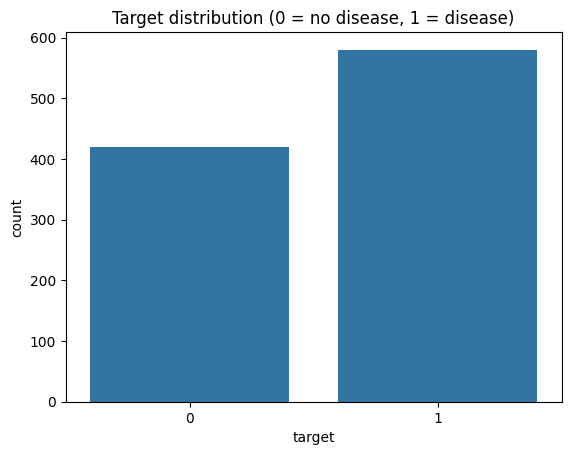

In [ ]:
sns.countplot(data=df, x='target')
plt.title("Target distribution (0 = no disease, 1 = disease)")
plt.show()

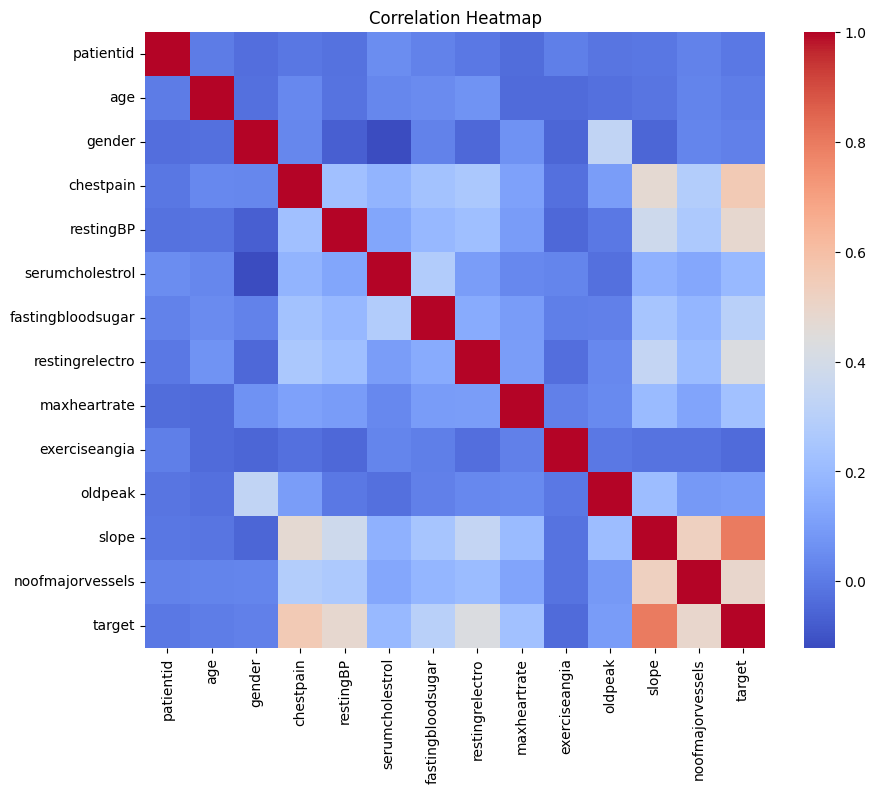

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

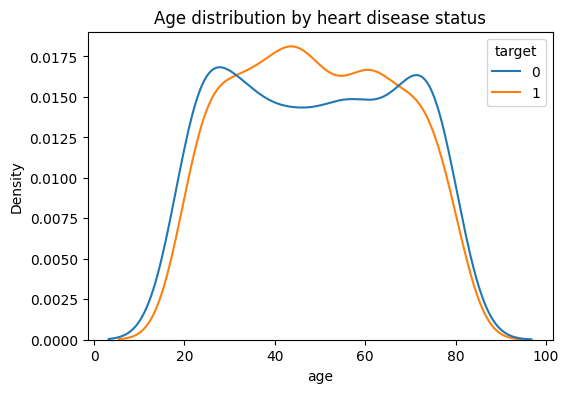

In [ ]:
# Age distribution by target
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='age', hue='target', common_norm=False)
plt.title("Age distribution by heart disease status")
plt.show()

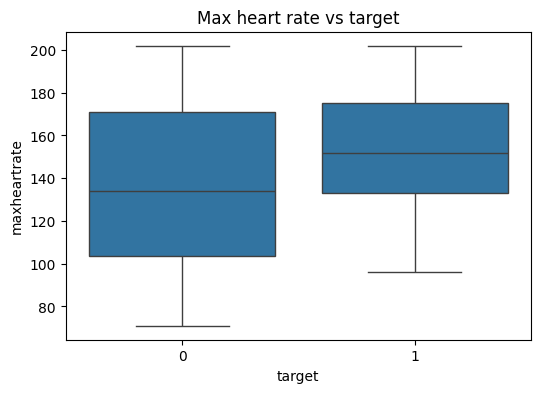

In [ ]:
# max heart rate by target
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='target', y='maxheartrate')
plt.title("Max heart rate vs target")
plt.show()

In [ ]:
# Drop ID column because it is just an identifier
df = df.drop(columns=['patientid'])

# Features and target
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
# Train/validation/test split (60/20/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

print(X_train.shape, X_val.shape,X_test.shape)

(600, 12) (200, 12) (200, 12)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
def evaluate_model(name, model, X_tr, y_tr, X_te, y_te, proba=True):
    y_pred_train = model.predict(X_tr)
    y_pred_test  = model.predict(X_te)

    metrics = {}
    metrics['model'] = name
    metrics['train_accuracy'] = accuracy_score(y_tr, y_pred_train)
    metrics['test_accuracy']  = accuracy_score(y_te, y_pred_test)
    metrics['precision'] = precision_score(y_te, y_pred_test)
    metrics['recall']    = recall_score(y_te, y_pred_test)
    metrics['f1']        = f1_score(y_te, y_pred_test)

    if proba:
        # if model has predict_proba
        y_proba = model.predict_proba(X_te)[:, 1]
        metrics['roc_auc'] = roc_auc_score(y_te, y_proba)
    else:
        metrics['roc_auc'] = None

    print(f"\n=== {name} ===")
    print("Train accuracy:", metrics['train_accuracy'])
    print("Test accuracy :", metrics['test_accuracy'])
    print("Precision     :", metrics['precision'])
    print("Recall        :", metrics['recall'])
    print("F1-score      :", metrics['f1'])
    if metrics['roc_auc'] is not None:
        print("ROC-AUC       :", metrics['roc_auc'])

    # Confusion matrix
    cm = confusion_matrix(y_te, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return metrics



=== Logistic Regression ===
Train accuracy: 0.9633333333333334
Test accuracy : 0.975
Precision     : 0.9743589743589743
Recall        : 0.9827586206896551
F1-score      : 0.9785407725321889
ROC-AUC       : 0.9977422003284072


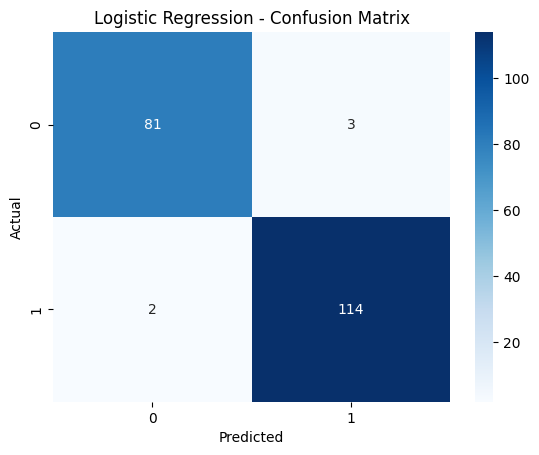

In [ ]:
#Logistic Regression
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear'
)
log_reg.fit(X_train_scaled, y_train)

log_reg_metrics = evaluate_model(
    "Logistic Regression",
    log_reg,
    X_train_scaled, y_train,
    X_test_scaled, y_test,
    proba=True
)

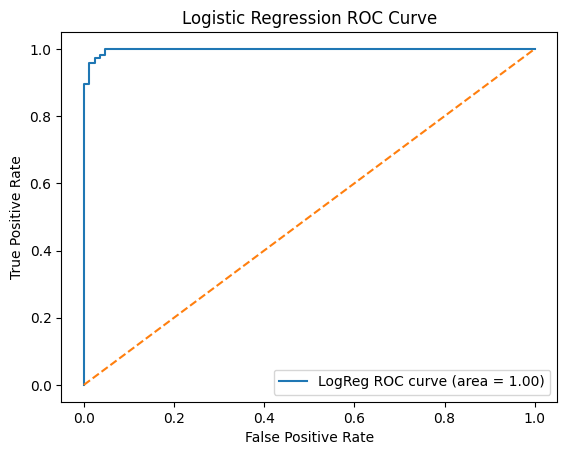

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"LogReg ROC curve (area = {roc_auc_lr:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()


=== Random Forest ===
Train accuracy: 0.9916666666666667
Test accuracy : 0.985
Precision     : 0.9829059829059829
Recall        : 0.9913793103448276
F1-score      : 0.9871244635193133
ROC-AUC       : 0.998460591133005


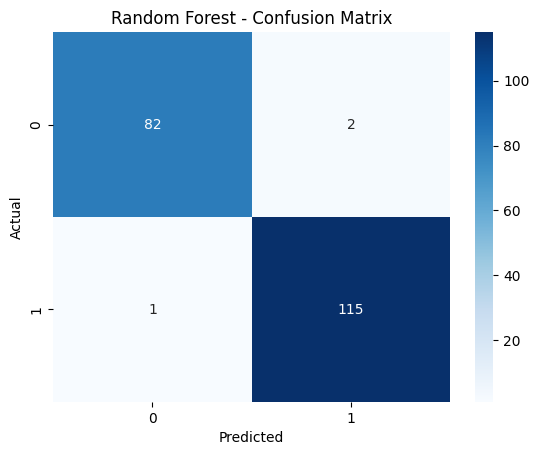

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    class_weight='balanced_subsample'
)

rf.fit(X_train, y_train)
rf_metrics = evaluate_model(
    "Random Forest",
    rf,
    X_train, y_train,
    X_test, y_test,
    proba=True
)

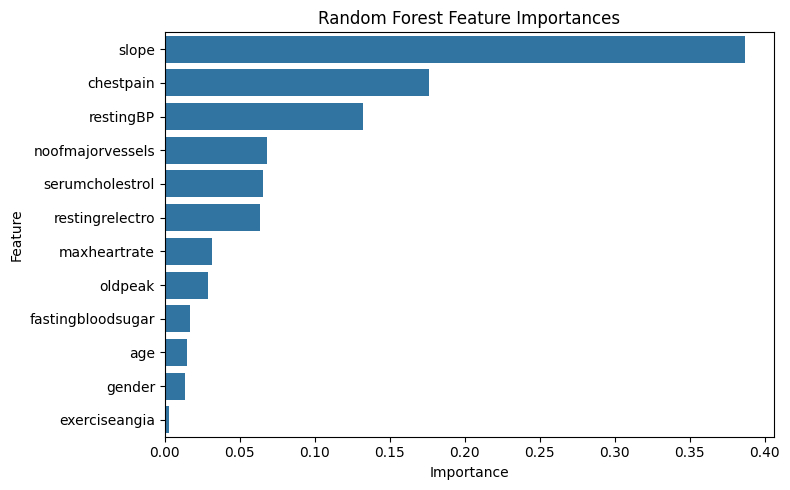

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

MLP: All Features

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
input_dim = X_train_scaled.shape[1]

model_mlp = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model_mlp.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5328 - loss: 0.6824 - val_accuracy: 0.7500 - val_loss: 0.6116
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6902 - loss: 0.6037 - val_accuracy: 0.8100 - val_loss: 0.5393
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7292 - loss: 0.5663 - val_accuracy: 0.8500 - val_loss: 0.4785
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8058 - loss: 0.4794 - val_accuracy: 0.8700 - val_loss: 0.4194
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8179 - loss: 0.4581 - val_accuracy: 0.9000 - val_loss: 0.3658
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8428 - loss: 0.3833 - val_accuracy: 0.9150 - val_loss: 0.3093
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9022 - loss: 0.3253 - val_accuracy: 0.9300 - val_loss: 0.2684
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9034 - loss: 0.2790 - val_accuracy: 0.9300 - val_lo

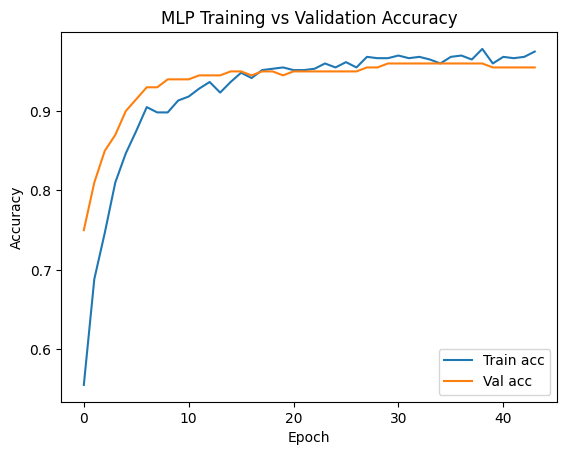

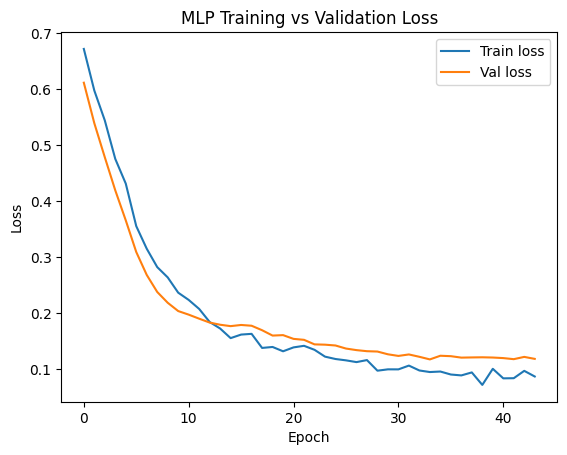

In [ ]:
# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MLP Training vs Validation Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training vs Validation Loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

=== MLP (Keras) ===
train_accuracy: 0.9750000238418579
test_accuracy: 0.975
precision: 0.9663865546218487
recall: 0.9913793103448276
f1: 0.9787234042553191
roc_auc: 0.9954844006568144


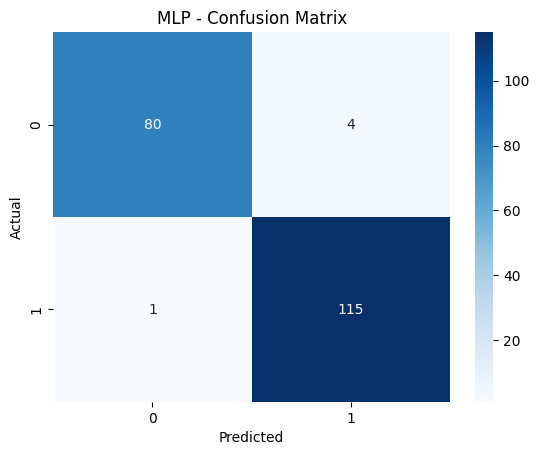

In [ ]:
# Predictions on test set
y_proba_mlp = model_mlp.predict(X_test_scaled).ravel()
y_pred_mlp  = (y_proba_mlp >= 0.5).astype(int)

mlp_metrics = {
    'model': 'MLP (Keras)',
    'train_accuracy': history.history['accuracy'][-1],
    'test_accuracy': accuracy_score(y_test, y_pred_mlp),
    'precision': precision_score(y_test, y_pred_mlp),
    'recall': recall_score(y_test, y_pred_mlp),
    'f1': f1_score(y_test, y_pred_mlp),
    'roc_auc': roc_auc_score(y_test, y_proba_mlp)
}

print("\n=== MLP (Keras) ===")
for k, v in mlp_metrics.items():
    if k != 'model':
        print(f"{k}: {v}")

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title("MLP - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

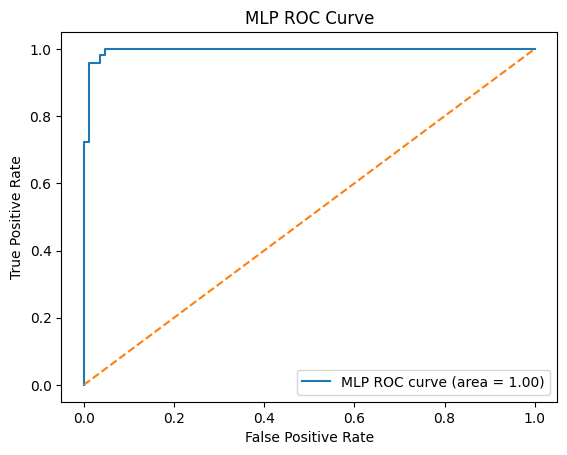

In [ ]:
# ROC curve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP ROC curve (area = {roc_auc_mlp:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend(loc="lower right")
plt.show()

TabNet

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
# Convert scaled arrays back to DataFrames for column access
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df   = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# Prepare full feature input
X_tr = X_train_scaled_df.values
X_val_ = X_val_scaled_df.values
X_te = X_test_scaled_df.values

# Encode target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

# Train TabNet
tabnet_all = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=0
)

tabnet_all.fit(
    X_train=X_tr, y_train=y_train_enc,
    eval_set=[(X_val_, y_val_enc)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=10,
    batch_size=32,
    virtual_batch_size=16
)


Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_accuracy = 0.965


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (All Features) ===
Test Accuracy : 0.95
Precision     : 0.9274193548387096
Recall        : 0.9913793103448276
F1-score      : 0.9583333333333334
ROC-AUC       : 0.9821428571428572


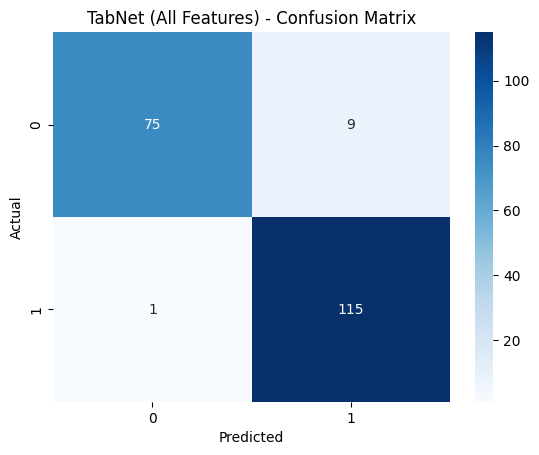

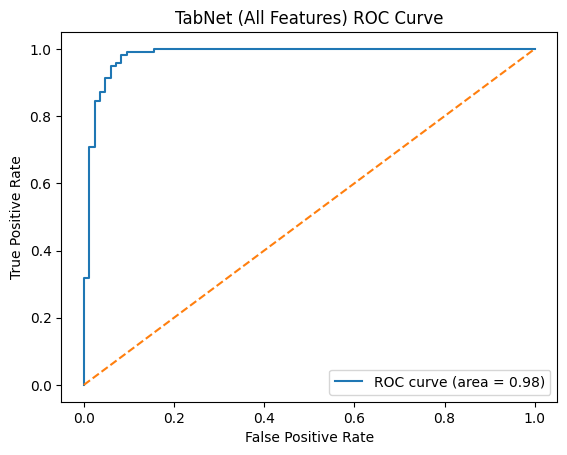

In [ ]:
# Predictions
y_pred_all = tabnet_all.predict(X_te)
y_proba_all = tabnet_all.predict_proba(X_te)[:, 1]

# Metrics
print("\n=== TabNet (All Features) ===")
print("Test Accuracy :", accuracy_score(y_test_enc, y_pred_all))
print("Precision     :", precision_score(y_test_enc, y_pred_all))
print("Recall        :", recall_score(y_test_enc, y_pred_all))
print("F1-score      :", f1_score(y_test_enc, y_pred_all))
print("ROC-AUC       :", roc_auc_score(y_test_enc, y_proba_all))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred_all)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("TabNet (All Features) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_enc, y_proba_all)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_score(y_test_enc, y_proba_all):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("TabNet (All Features) ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
tabnet_metrics = {
    'model': 'TabNet (All Features)',
    'train_accuracy': accuracy_score(y_train_enc, tabnet_all.predict(X_tr)),
    'test_accuracy': accuracy_score(y_test_enc, y_pred_all),
    'precision': precision_score(y_test_enc, y_pred_all),
    'recall': recall_score(y_test_enc, y_pred_all),
    'f1': f1_score(y_test_enc, y_pred_all),
    'roc_auc': roc_auc_score(y_test_enc, y_proba_all)
}

All feature model comparison

In [ ]:
results = pd.DataFrame([
    log_reg_metrics,
    rf_metrics,
    mlp_metrics,
    tabnet_metrics
])

results[['model', 'train_accuracy', 'test_accuracy',
         'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.963333,0.975,0.974359,0.982759,0.978541,0.997742
1,Random Forest,0.991667,0.985,0.982906,0.991379,0.987124,0.998461
2,MLP (Keras),0.975000,0.975,0.966387,0.991379,0.978723,0.995484
3,TabNet (All Features),0.961667,0.950,0.927419,0.991379,0.958333,0.982143


Single and Multi-Feature Model Functions

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score

def train_mlp_single(feature_name):
    X_tr = X_train_scaled_df[[feature_name]]
    X_val = X_val_scaled_df[[feature_name]]
    X_te = X_test_scaled_df[[feature_name]]

    model = Sequential([
        Dense(16, activation='relu', input_shape=(1,)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_tr, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

    y_proba = model.predict(X_te).ravel()
    y_pred = (y_proba >= 0.5).astype(int)

    print(f"\n=== MLP ({feature_name}) ===")
    print("Test Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision     :", precision_score(y_test, y_pred))
    print("Recall        :", recall_score(y_test, y_pred))
    print("F1-score      :", f1_score(y_test, y_pred))
    print("ROC-AUC       :", roc_auc_score(y_test, y_proba))

     # === Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"MLP ({feature_name}) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # === Loss Curves ===
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"MLP ({feature_name}) Loss Curves")
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy Loss')
    plt.legend()
    plt.show()

    # === ROC Curve ===
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{feature_name} ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"MLP ({feature_name}) ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'model': f'MLP ({feature_name})',
        'train_accuracy': accuracy_score(y_train, (model.predict(X_tr).ravel() >= 0.5).astype(int)),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

    return metrics


In [ ]:
def train_mlp_multi(feature_list):
    X_tr = X_train_scaled_df[feature_list]
    X_val = X_val_scaled_df[feature_list]
    X_te = X_test_scaled_df[feature_list]

    model = Sequential([
        Dense(16, activation='relu', input_shape=(len(feature_list),)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_tr, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

    y_proba = model.predict(X_te).ravel()
    y_pred = (y_proba >= 0.5).astype(int)

    print(f"\n=== MLP ({', '.join(feature_list)}) ===")
    print("Test Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision     :", precision_score(y_test, y_pred))
    print("Recall        :", recall_score(y_test, y_pred))
    print("F1-score      :", f1_score(y_test, y_pred))
    print("ROC-AUC       :", roc_auc_score(y_test, y_proba))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"MLP ({', '.join(feature_list)}) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # === Loss Curves ===
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"MLP ({feature_list}) Loss Curves")
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy Loss')
    plt.legend()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"MLP ({', '.join(feature_list)}) ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'model': f'MLP ({feature_list})',
        'train_accuracy': accuracy_score(y_train, (model.predict(X_tr).ravel() >= 0.5).astype(int)),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

    return metrics



In [ ]:
def train_tabnet_single(feature):
    X_tr = X_train_scaled_df[[feature]].values
    X_val_ = X_val_scaled_df[[feature]].values
    X_te = X_test_scaled_df[[feature]].values

    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_val_enc   = le.transform(y_val)
    y_test_enc  = le.transform(y_test)

    tabnet = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        scheduler_params={"step_size":10, "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0
    )

    tabnet.fit(
        X_train=X_tr, y_train=y_train_enc,
        eval_set=[(X_val_, y_val_enc)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=32,
        virtual_batch_size=16
    )

    y_proba = tabnet.predict_proba(X_te)[:, 1]
    y_pred = tabnet.predict(X_te)

    print(f"\n=== TabNet ({feature}) ===")
    print("Test Accuracy :", accuracy_score(y_test_enc, y_pred))
    print("Precision     :", precision_score(y_test_enc, y_pred))
    print("Recall        :", recall_score(y_test_enc, y_pred))
    print("F1-score      :", f1_score(y_test_enc, y_pred))
    print("ROC-AUC       :", roc_auc_score(y_test_enc, y_proba))

    cm = confusion_matrix(y_test_enc, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"TabNet ({feature}) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test_enc, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_score(y_test_enc, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"TabNet ({feature}) ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'model': f'TabNet ({feature})',
        'train_accuracy': accuracy_score(y_train_enc, tabnet.predict(X_tr)),
        'test_accuracy': accuracy_score(y_test_enc, y_pred),
        'precision': precision_score(y_test_enc, y_pred),
        'recall': recall_score(y_test_enc, y_pred),
        'f1': f1_score(y_test_enc, y_pred),
        'roc_auc': roc_auc_score(y_test_enc, y_proba)
    }

    return metrics

In [ ]:
def train_tabnet_multi(features):
    X_tr = X_train_scaled_df[features].values
    X_val_ = X_val_scaled_df[features].values
    X_te = X_test_scaled_df[features].values

    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_val_enc   = le.transform(y_val)
    y_test_enc  = le.transform(y_test)

    tabnet = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        scheduler_params={"step_size":10, "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0
    )

    tabnet.fit(
        X_train=X_tr, y_train=y_train_enc,
        eval_set=[(X_val_, y_val_enc)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=32,
        virtual_batch_size=16
    )

    y_proba = tabnet.predict_proba(X_te)[:, 1]
    y_pred = tabnet.predict(X_te)

    print(f"\n=== TabNet ({', '.join(features)}) ===")
    print("Test Accuracy :", accuracy_score(y_test_enc, y_pred))
    print("Precision     :", precision_score(y_test_enc, y_pred))
    print("Recall        :", recall_score(y_test_enc, y_pred))
    print("F1-score      :", f1_score(y_test_enc, y_pred))
    print("ROC-AUC       :", roc_auc_score(y_test_enc, y_proba))

    cm = confusion_matrix(y_test_enc, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"TabNet ({', '.join(features)}) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test_enc, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_score(y_test_enc, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"TabNet ({', '.join(features)}) ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'model': f'TabNet ({", ".join(features)})',
        'train_accuracy': accuracy_score(y_train_enc, tabnet.predict(X_tr)),
        'test_accuracy': accuracy_score(y_test_enc, y_pred),
        'precision': precision_score(y_test_enc, y_pred),
        'recall': recall_score(y_test_enc, y_pred),
        'f1': f1_score(y_test_enc, y_pred),
        'roc_auc': roc_auc_score(y_test_enc, y_proba)
    }

    return metrics

Single-Feature MLPs

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

=== MLP (slope) ===
Test Accuracy : 0.94
Precision     : 0.9814814814814815
Recall        : 0.9137931034482759
F1-score      : 0.9464285714285714
ROC-AUC       : 0.9671592775041051


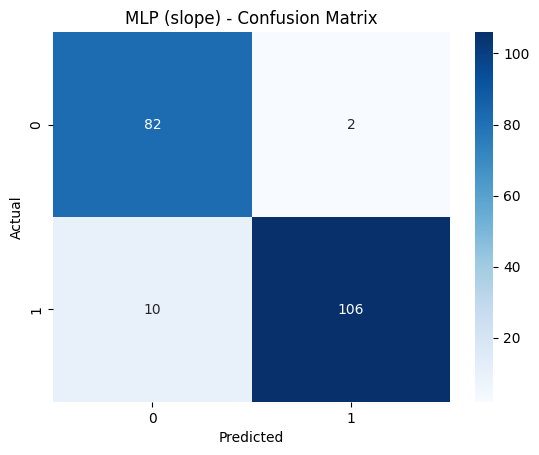

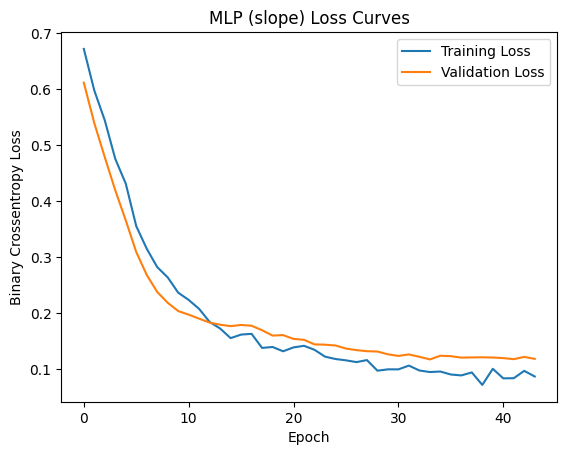

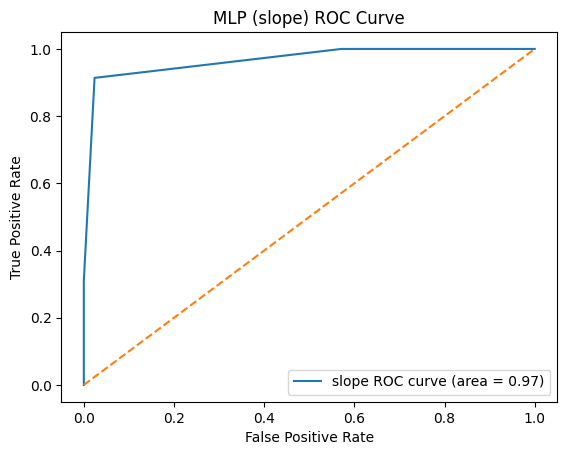

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
mlp_slope_m = train_mlp_single('slope')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

=== MLP (chestpain) ===
Test Accuracy : 0.74
Precision     : 0.7666666666666667
Recall        : 0.7931034482758621
F1-score      : 0.7796610169491526
ROC-AUC       : 0.7788382594417078


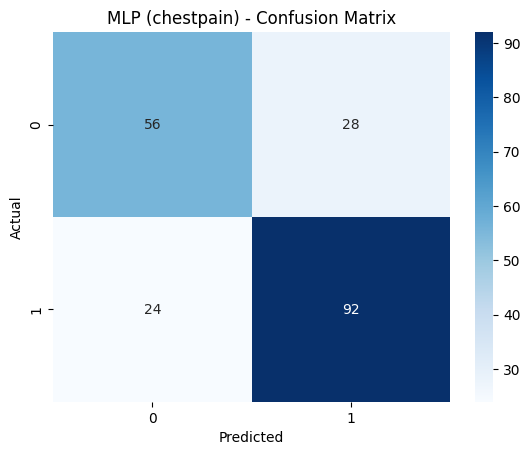

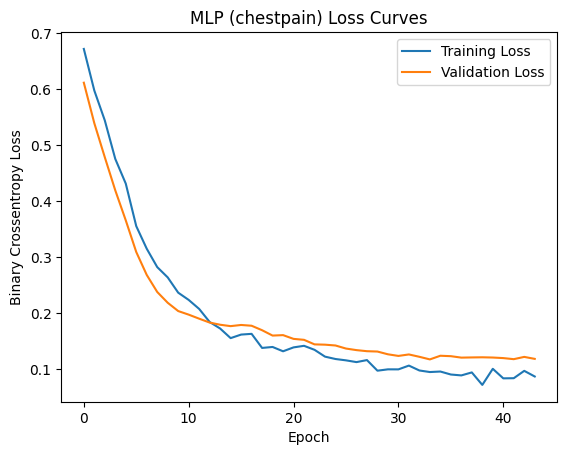

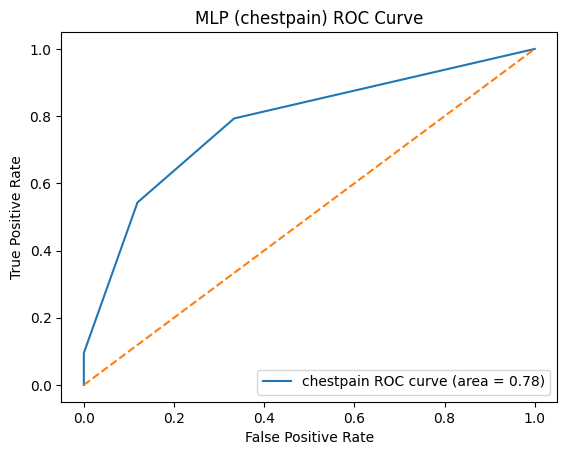

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_chestpain_m = train_mlp_single('chestpain')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

=== MLP (restingBP) ===
Test Accuracy : 0.75
Precision     : 0.7894736842105263
Recall        : 0.7758620689655172
F1-score      : 0.782608695652174
ROC-AUC       : 0.8010057471264367


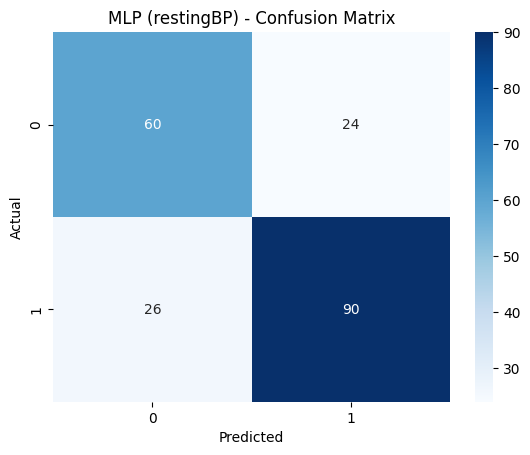

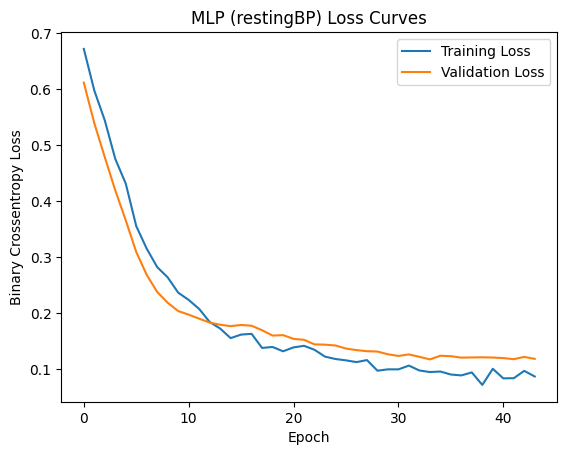

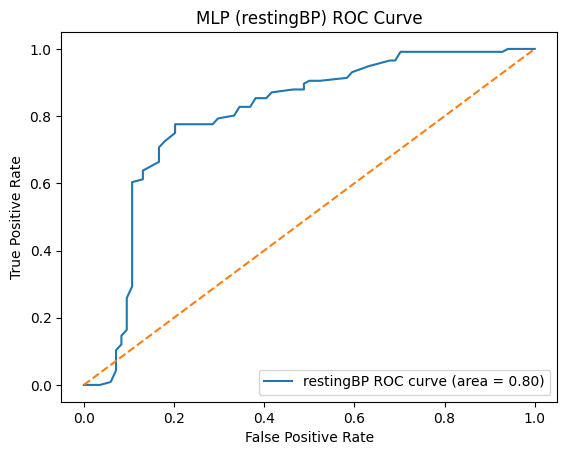

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_restingBP_m = train_mlp_single('restingBP')

Single-Feature TabNets


Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.945


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (slope) ===
Test Accuracy : 0.94
Precision     : 0.9814814814814815
Recall        : 0.9137931034482759
F1-score      : 0.9464285714285714
ROC-AUC       : 0.9695197044334976


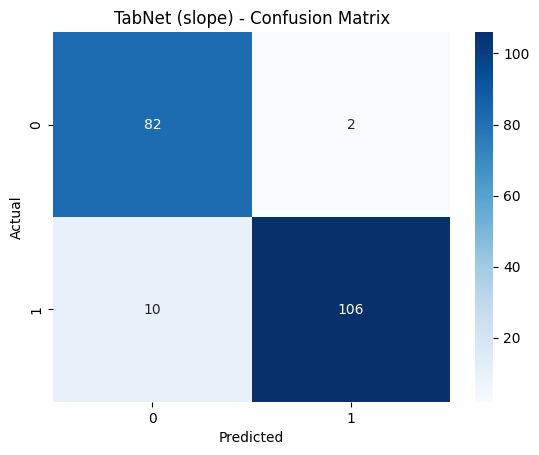

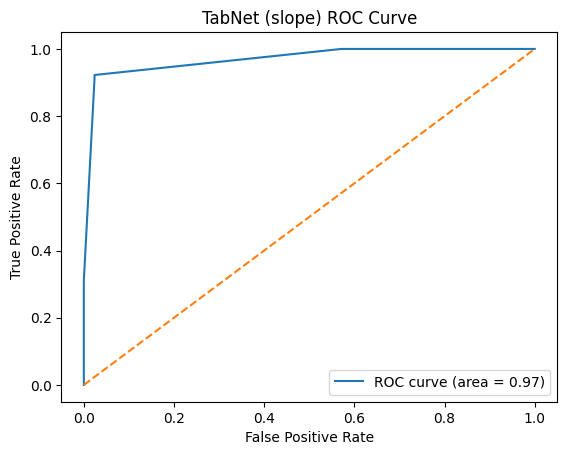

In [ ]:
tab_slope_m = train_tabnet_single('slope')


Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.775


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (chestpain) ===
Test Accuracy : 0.74
Precision     : 0.7666666666666667
Recall        : 0.7931034482758621
F1-score      : 0.7796610169491526
ROC-AUC       : 0.7815065681444993


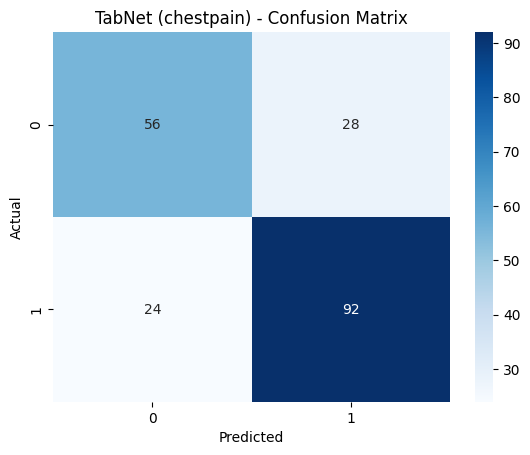

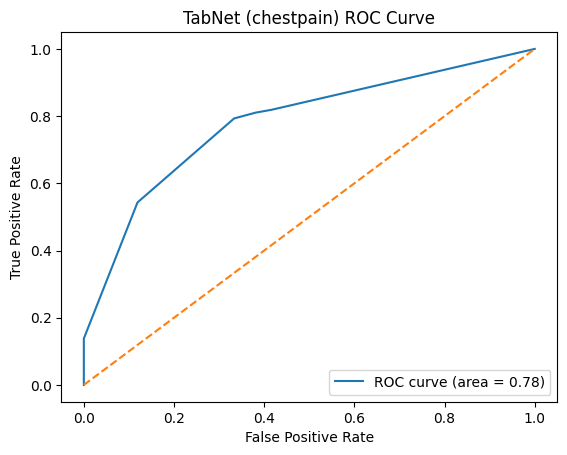

In [ ]:
tab_chest_m = train_tabnet_single('chestpain')


Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_accuracy = 0.77


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (restingBP) ===
Test Accuracy : 0.77
Precision     : 0.8365384615384616
Recall        : 0.75
F1-score      : 0.7909090909090909
ROC-AUC       : 0.8395935960591133


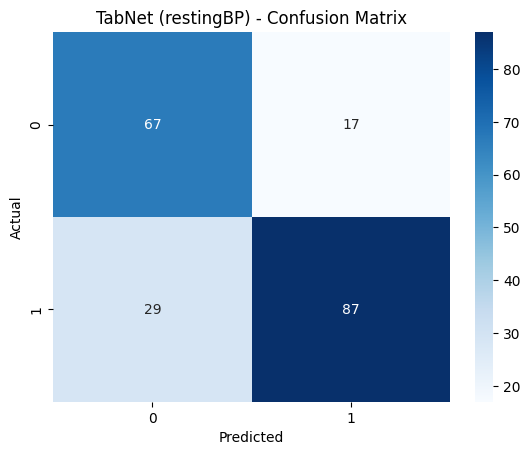

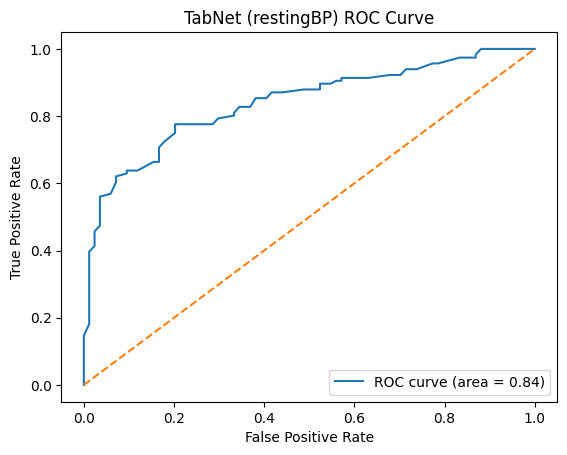

In [ ]:
tab_rest_m = train_tabnet_single('restingBP')

Single-Feature Results DFs

In [ ]:
results_df = pd.DataFrame([
    mlp_slope_m,
    mlp_restingBP_m,
    mlp_chestpain_m,
])

ranked_df = results_df.sort_values(by='test_accuracy', ascending=False)
ranked_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
0,MLP (slope),0.900000,0.94,0.981481,0.913793,0.946429,0.967159
1,MLP (restingBP),0.760000,0.75,0.789474,0.775862,0.782609,0.801006
2,MLP (chestpain),0.801667,0.74,0.766667,0.793103,0.779661,0.778838


In [ ]:
results_df = pd.DataFrame([
    tab_slope_m,
    tab_rest_m,
    tab_chest_m
])

ranked_df = results_df.sort_values(by='test_accuracy', ascending=False)
ranked_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
0,TabNet (slope),0.900000,0.94,0.981481,0.913793,0.946429,0.969520
1,TabNet (restingBP),0.763333,0.77,0.836538,0.750000,0.790909,0.839594
2,TabNet (chestpain),0.801667,0.74,0.766667,0.793103,0.779661,0.781507


Multi-Feature MLPs

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

=== MLP (slope, chestpain) ===
Test Accuracy : 0.94
Precision     : 0.940677966101695
Recall        : 0.9568965517241379
F1-score      : 0.9487179487179487
ROC-AUC       : 0.9812705254515599


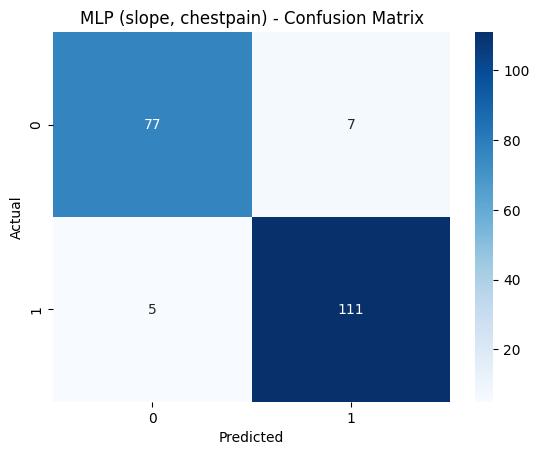

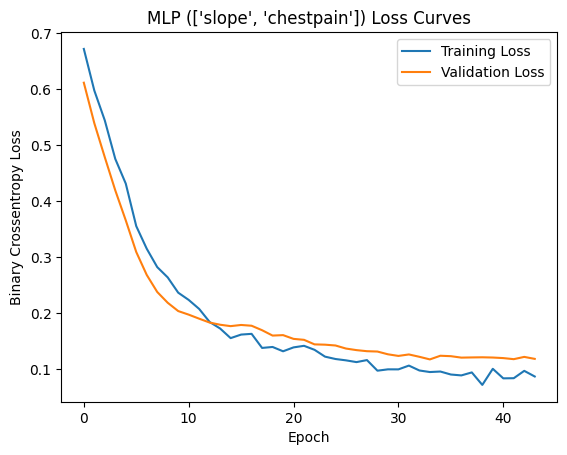

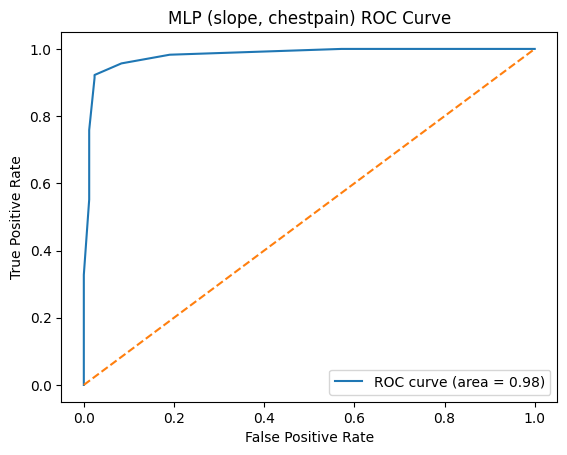

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_slo_ch_m = train_mlp_multi(['slope', 'chestpain'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

=== MLP (slope, restingBP) ===
Test Accuracy : 0.94
Precision     : 0.940677966101695
Recall        : 0.9568965517241379
F1-score      : 0.9487179487179487
ROC-AUC       : 0.9878386699507389


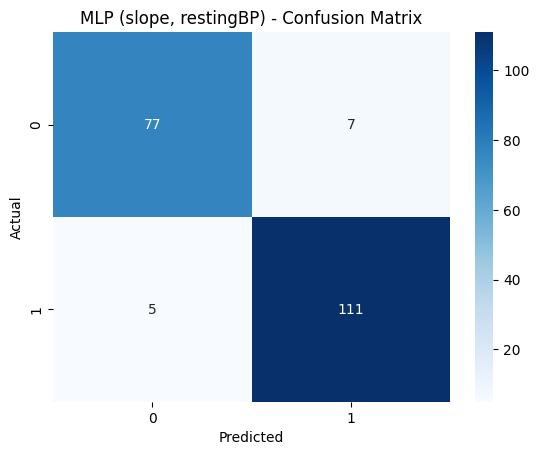

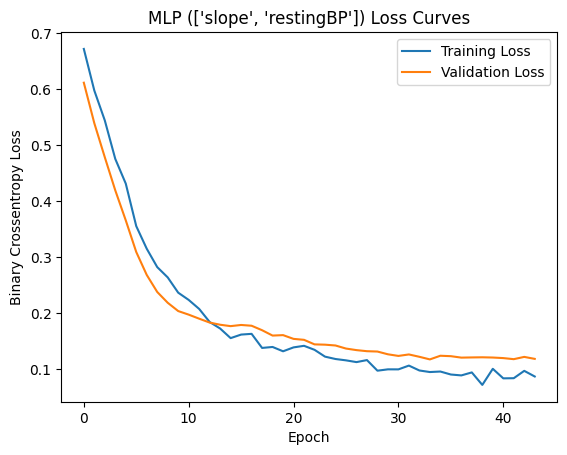

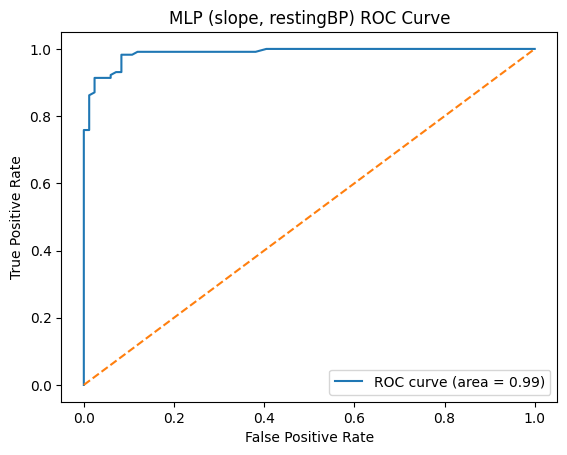

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_slo_res_m = train_mlp_multi(['slope', 'restingBP'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

=== MLP (chestpain, restingBP) ===
Test Accuracy : 0.81
Precision     : 0.8095238095238095
Recall        : 0.8793103448275862
F1-score      : 0.8429752066115702
ROC-AUC       : 0.9047619047619048


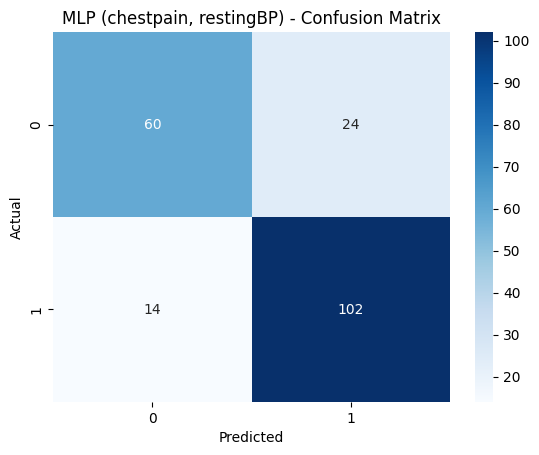

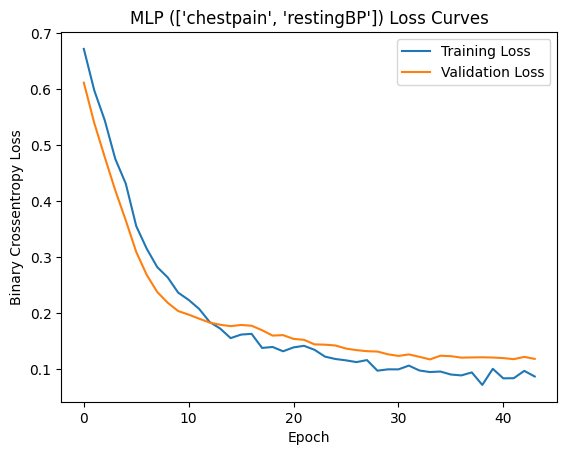

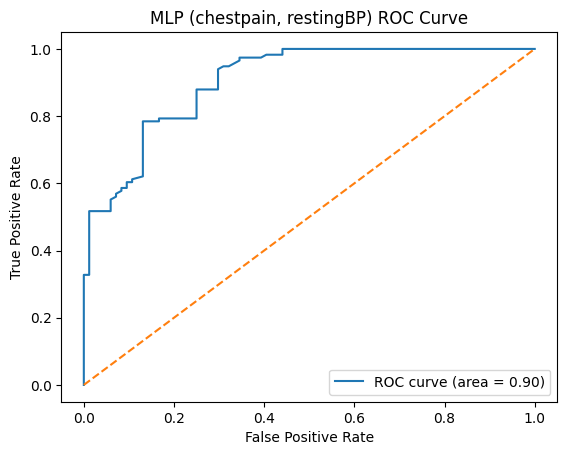

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_che_res_m = train_mlp_multi(['chestpain', 'restingBP'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

=== MLP (slope, chestpain, restingBP) ===
Test Accuracy : 0.95
Precision     : 0.9344262295081968
Recall        : 0.9827586206896551
F1-score      : 0.957983193277311
ROC-AUC       : 0.9895833333333334


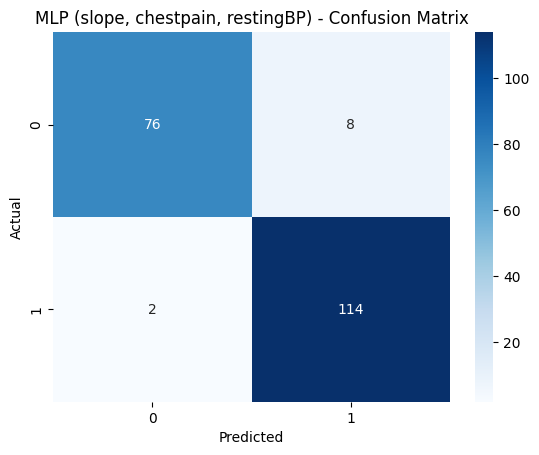

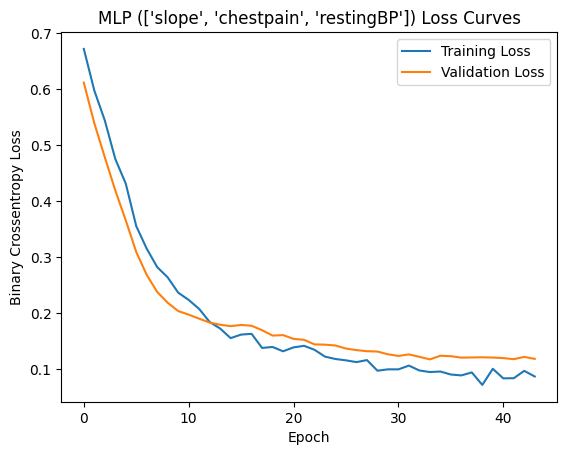

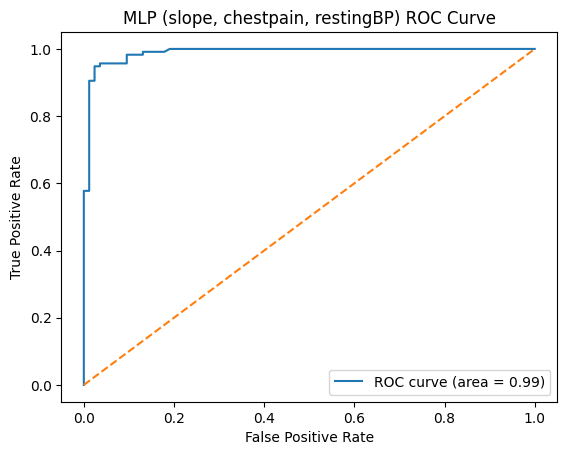

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_all_m = train_mlp_multi(['slope', 'chestpain', 'restingBP'])

Multi-Feature TabNets


Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_accuracy = 0.935


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (slope, chestpain) ===
Test Accuracy : 0.94
Precision     : 0.940677966101695
Recall        : 0.9568965517241379
F1-score      : 0.9487179487179487
ROC-AUC       : 0.9802442528735633


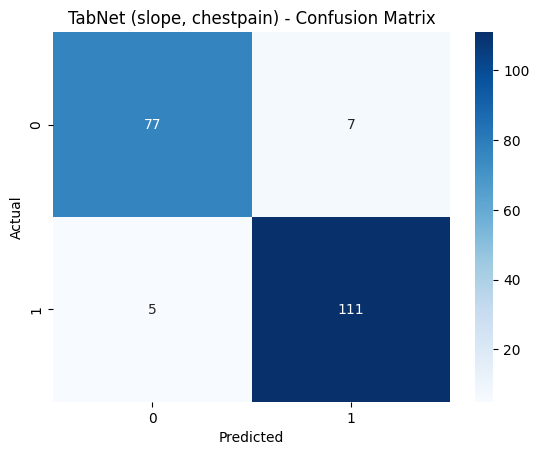

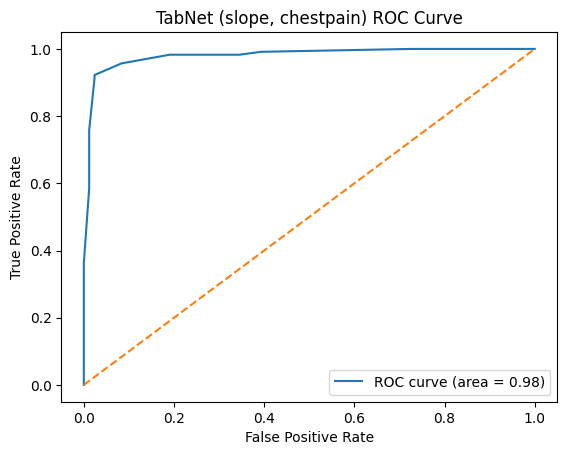

In [ ]:
tab_slo_che_m = train_tabnet_multi(['slope', 'chestpain'])


Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_accuracy = 0.945


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (slope, restingBP) ===
Test Accuracy : 0.95
Precision     : 0.9732142857142857
Recall        : 0.9396551724137931
F1-score      : 0.956140350877193
ROC-AUC       : 0.9892241379310345


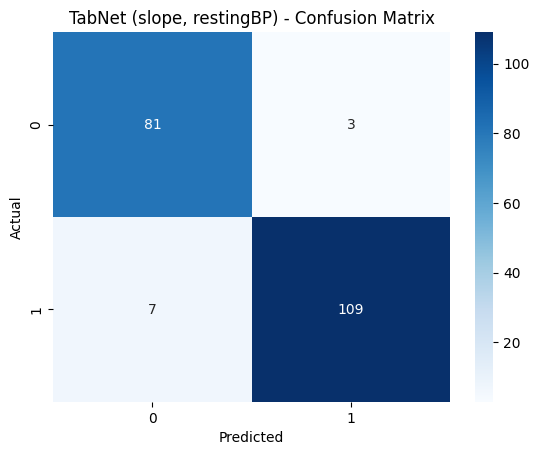

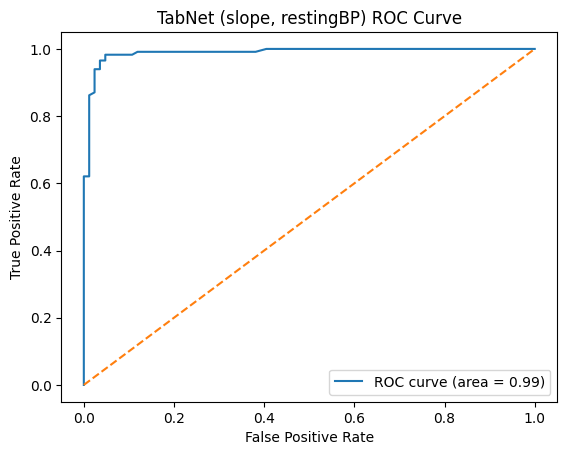

In [ ]:
tab_slo_res_m = train_tabnet_multi(['slope', 'restingBP'])


Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_accuracy = 0.875


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (chestpain, restingBP) ===
Test Accuracy : 0.88
Precision     : 0.859375
Recall        : 0.9482758620689655
F1-score      : 0.9016393442622951
ROC-AUC       : 0.9191810344827587


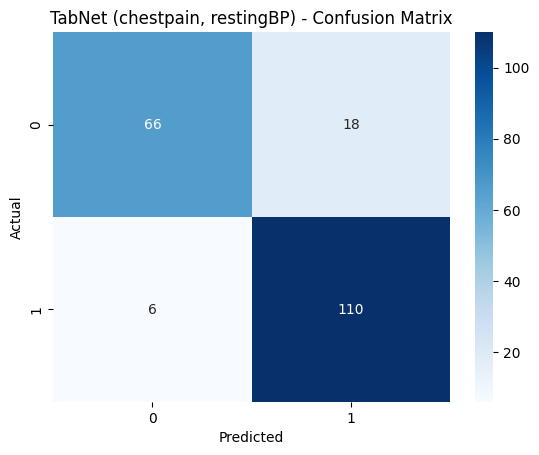

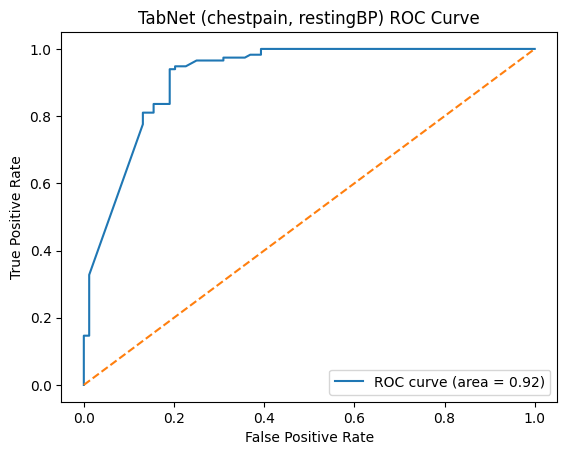

In [ ]:
tab_che_res_m = train_tabnet_multi(['chestpain', 'restingBP'])


Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.96


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (slope, chestpain, restingBP) ===
Test Accuracy : 0.955
Precision     : 0.9652173913043478
Recall        : 0.9568965517241379
F1-score      : 0.961038961038961
ROC-AUC       : 0.986863711001642


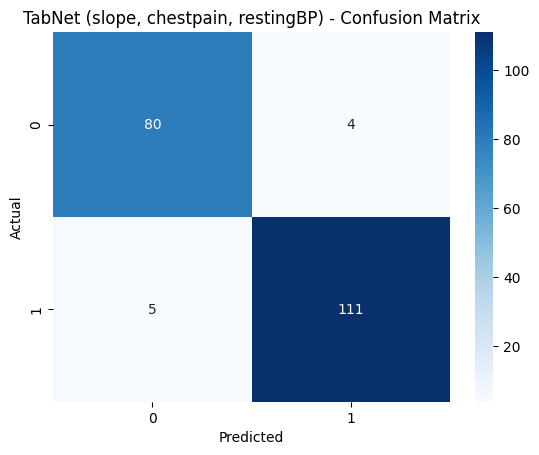

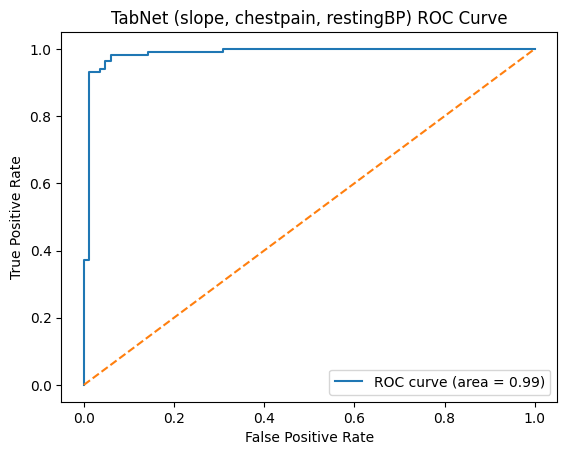

In [ ]:
tab_all_m = train_tabnet_multi(['slope', 'chestpain', 'restingBP'])

Quick Callback to Single-Feature

In [ ]:
results_df = pd.DataFrame([
    mlp_slope_m,
    mlp_restingBP_m,
    mlp_chestpain_m,
    mlp_all_m
])

ranked_df = results_df.sort_values(by='test_accuracy', ascending=False)
ranked_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
3,"MLP (['slope', 'chestpain', 'restingBP'])",0.938333,0.95,0.934426,0.982759,0.957983,0.989583
0,MLP (slope),0.900000,0.94,0.981481,0.913793,0.946429,0.967159
1,MLP (restingBP),0.760000,0.75,0.789474,0.775862,0.782609,0.801006
2,MLP (chestpain),0.801667,0.74,0.766667,0.793103,0.779661,0.778838


In [ ]:
results_df = pd.DataFrame([
    tab_slope_m,
    tab_rest_m,
    tab_chest_m,
    tab_all_m
])

ranked_df = results_df.sort_values(by='test_accuracy', ascending=False)
ranked_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
3,"TabNet (slope, chestpain, restingBP)",0.925000,0.955,0.965217,0.956897,0.961039,0.986864
0,TabNet (slope),0.900000,0.940,0.981481,0.913793,0.946429,0.969520
1,TabNet (restingBP),0.763333,0.770,0.836538,0.750000,0.790909,0.839594
2,TabNet (chestpain),0.801667,0.740,0.766667,0.793103,0.779661,0.781507


Multi-Feature Results DFs

In [ ]:
results_df = pd.DataFrame([
    mlp_slo_ch_m,
    mlp_slo_res_m,
    mlp_che_res_m,
    mlp_all_m
])

ranked_df = results_df.sort_values(by='test_accuracy', ascending=False)
ranked_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
3,"MLP (['slope', 'chestpain', 'restingBP'])",0.938333,0.95,0.934426,0.982759,0.957983,0.989583
0,"MLP (['slope', 'chestpain'])",0.921667,0.94,0.940678,0.956897,0.948718,0.981271
1,"MLP (['slope', 'restingBP'])",0.915000,0.94,0.940678,0.956897,0.948718,0.987839
2,"MLP (['chestpain', 'restingBP'])",0.858333,0.81,0.809524,0.879310,0.842975,0.904762


In [ ]:
results_df = pd.DataFrame([
    tab_slo_che_m,
    tab_slo_res_m,
    tab_che_res_m,
    tab_all_m
])

ranked_df = results_df.sort_values(by='test_accuracy', ascending=False)
ranked_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
3,"TabNet (slope, chestpain, restingBP)",0.925000,0.955,0.965217,0.956897,0.961039,0.986864
1,"TabNet (slope, restingBP)",0.918333,0.950,0.973214,0.939655,0.956140,0.989224
0,"TabNet (slope, chestpain)",0.921667,0.940,0.940678,0.956897,0.948718,0.980244
2,"TabNet (chestpain, restingBP)",0.905000,0.880,0.859375,0.948276,0.901639,0.919181


Lower Feature Importance MLPs

'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels'

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

=== MLP (age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, noofmajorvessels) ===
Test Accuracy : 0.9
Precision     : 0.9067796610169492
Recall        : 0.9224137931034483
F1-score      : 0.9145299145299145
ROC-AUC       : 0.9577175697865353


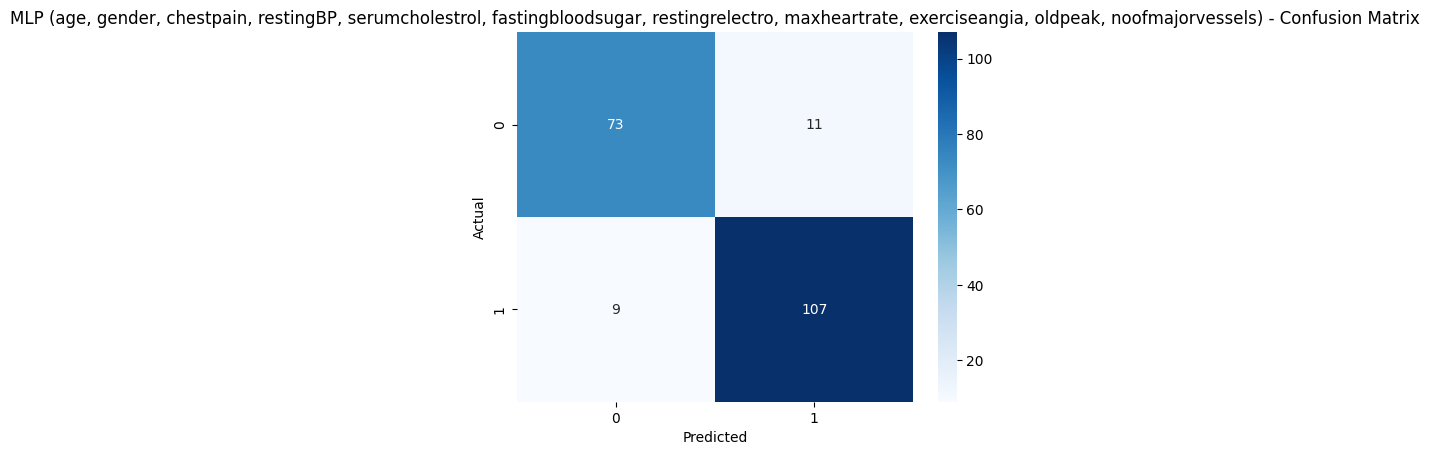

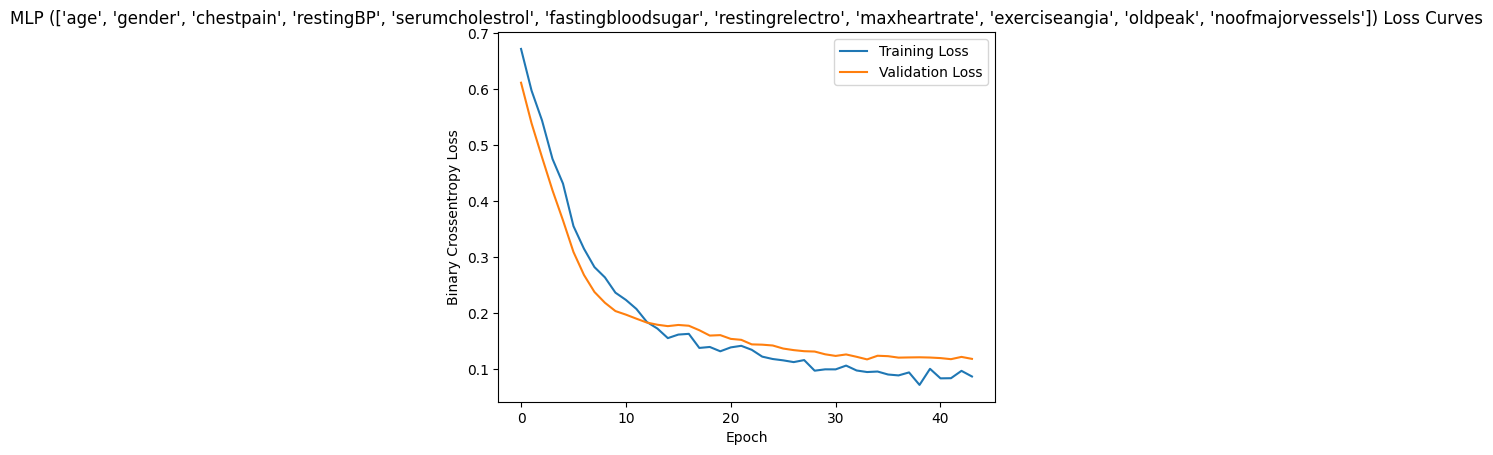

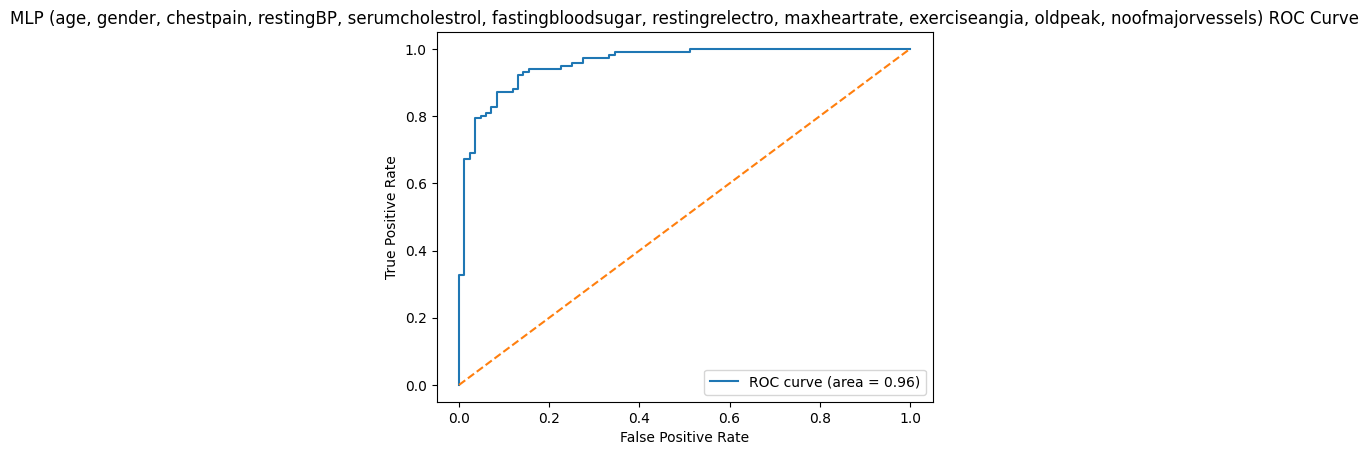

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
mlp_low_all_m = train_mlp_multi(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'noofmajorvessels'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

=== MLP (age, gender, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, noofmajorvessels) ===
Test Accuracy : 0.87
Precision     : 0.8813559322033898
Recall        : 0.896551724137931
F1-score      : 0.8888888888888888
ROC-AUC       : 0.937192118226601


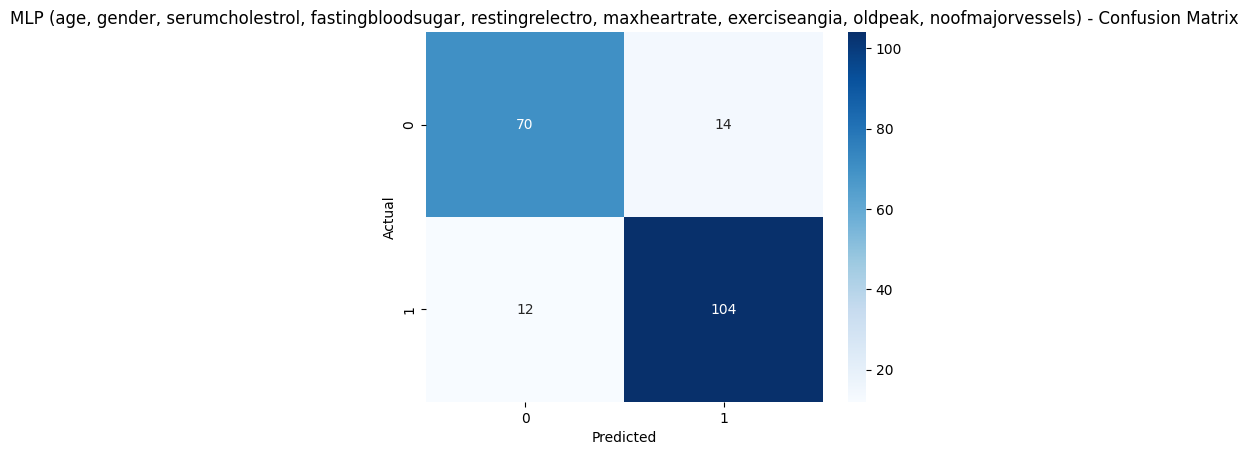

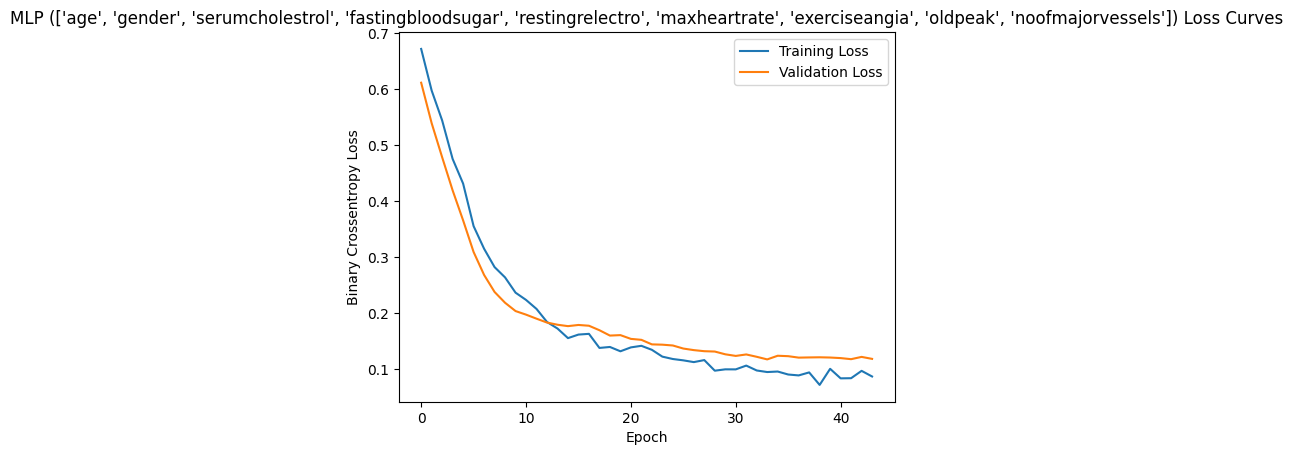

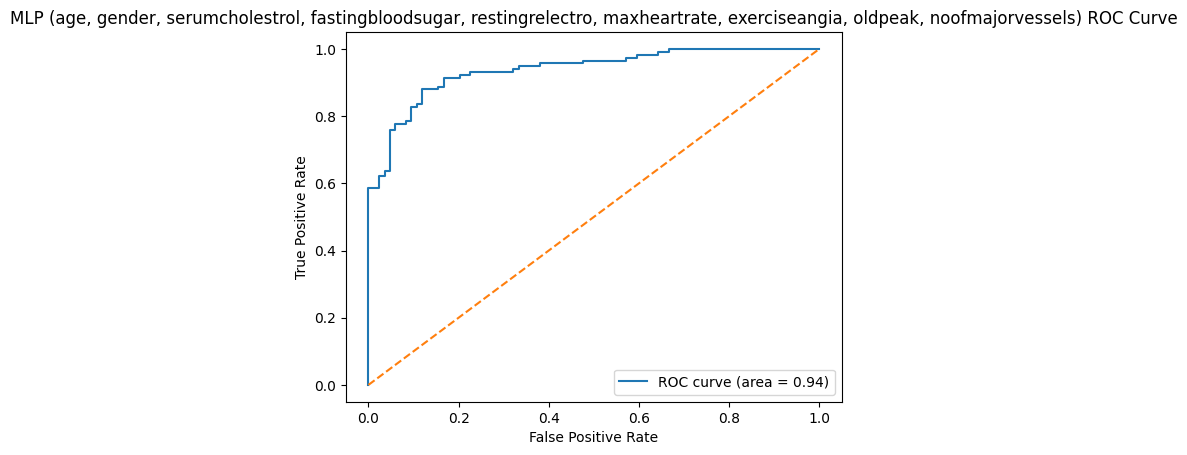

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_less_top_three_m = train_mlp_multi(['age', 'gender', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'noofmajorvessels'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

=== MLP (serumcholestrol, restingrelectro, noofmajorvessels) ===
Test Accuracy : 0.85
Precision     : 0.8583333333333333
Recall        : 0.8879310344827587
F1-score      : 0.8728813559322034
ROC-AUC       : 0.9233887520525451


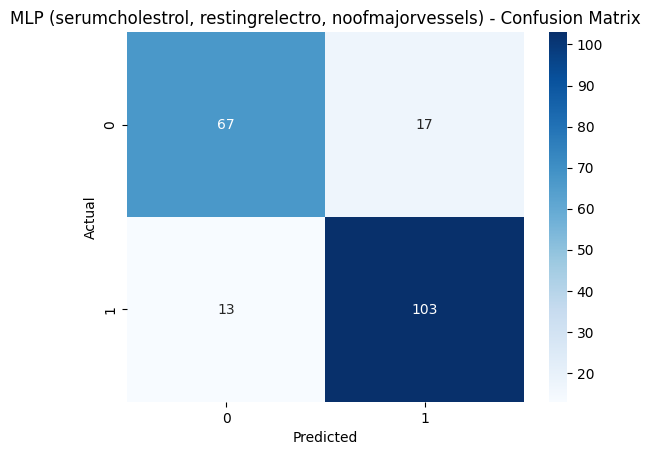

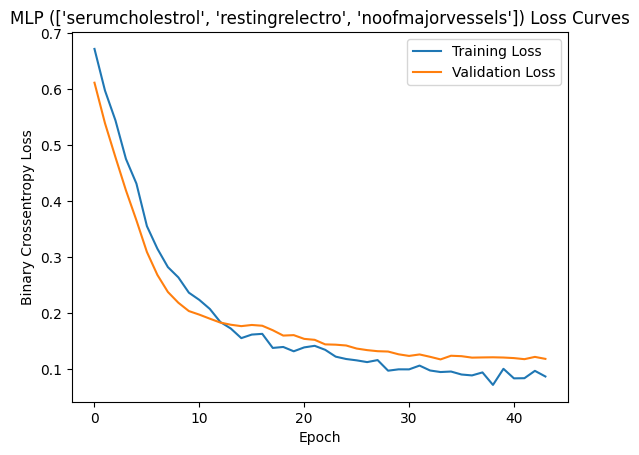

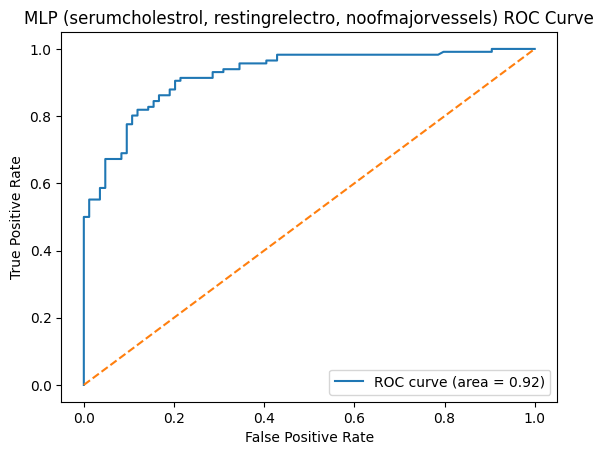

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_mid_three_m = train_mlp_multi(['serumcholestrol', 'restingrelectro', 'noofmajorvessels'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

=== MLP (age, gender, fastingbloodsugar, maxheartrate, exerciseangia, oldpeak) ===
Test Accuracy : 0.69
Precision     : 0.7076923076923077
Recall        : 0.7931034482758621
F1-score      : 0.7479674796747967
ROC-AUC       : 0.786843185550082


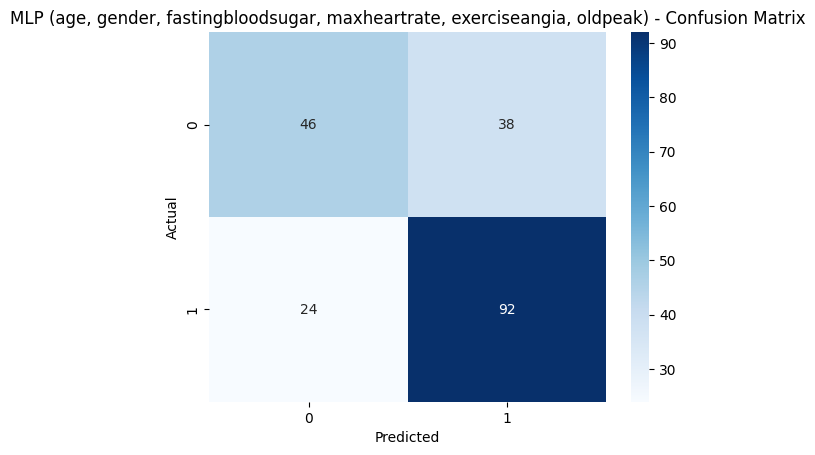

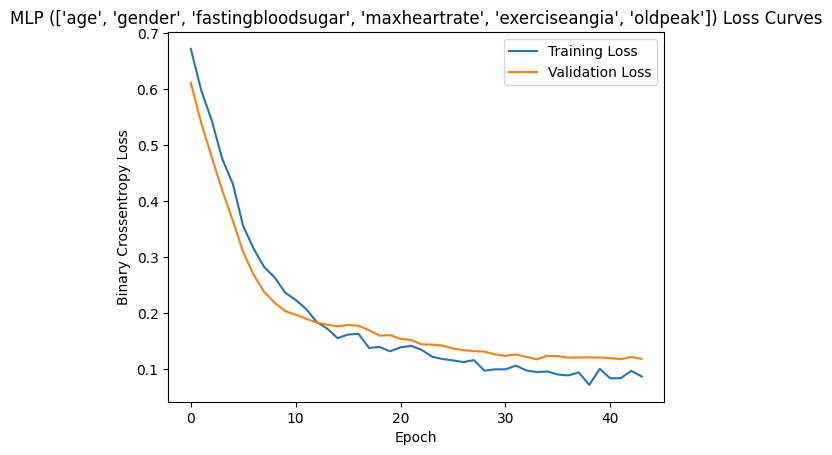

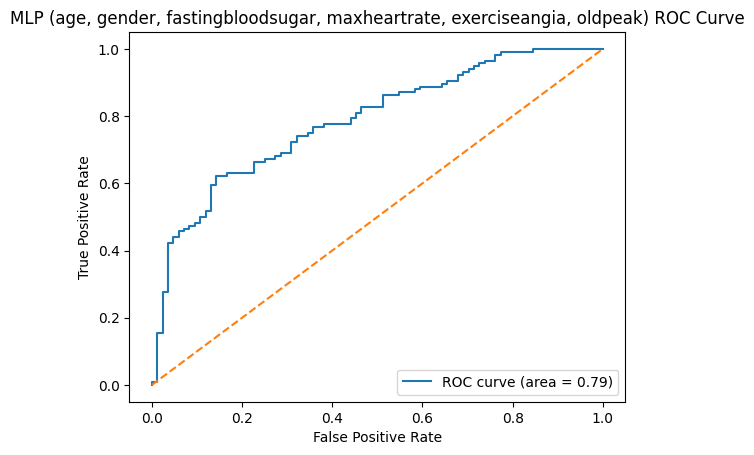

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mlp_low_six_m = train_mlp_multi(['age', 'gender', 'fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak'])


Lower Feature Importance TabNets


Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_accuracy = 0.94


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, noofmajorvessels) ===
Test Accuracy : 0.93
Precision     : 0.9180327868852459
Recall        : 0.9655172413793104
F1-score      : 0.9411764705882353
ROC-AUC       : 0.9708538587848933


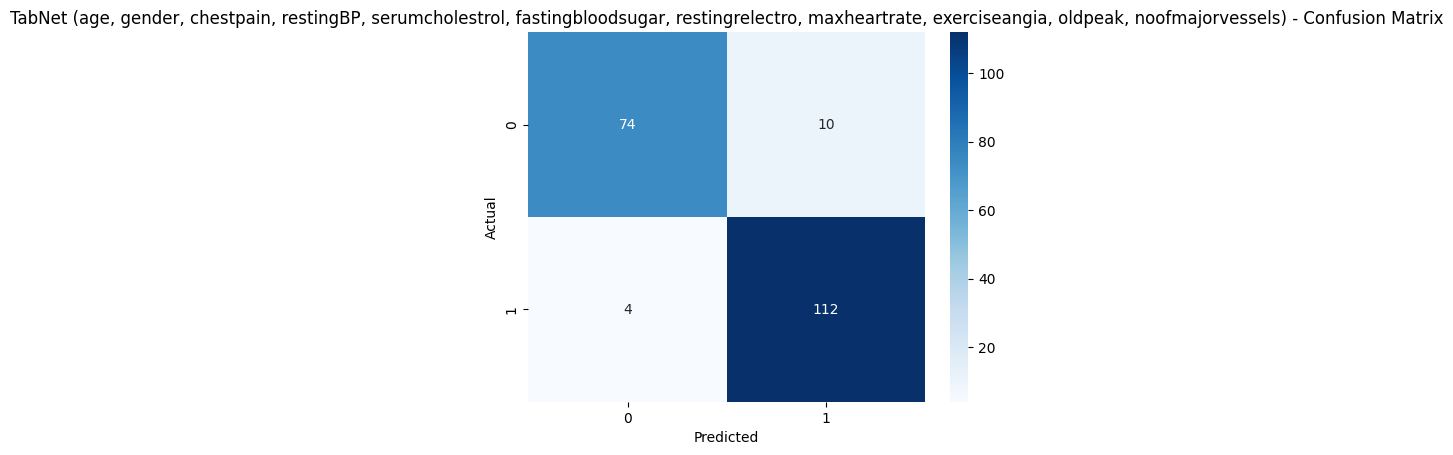

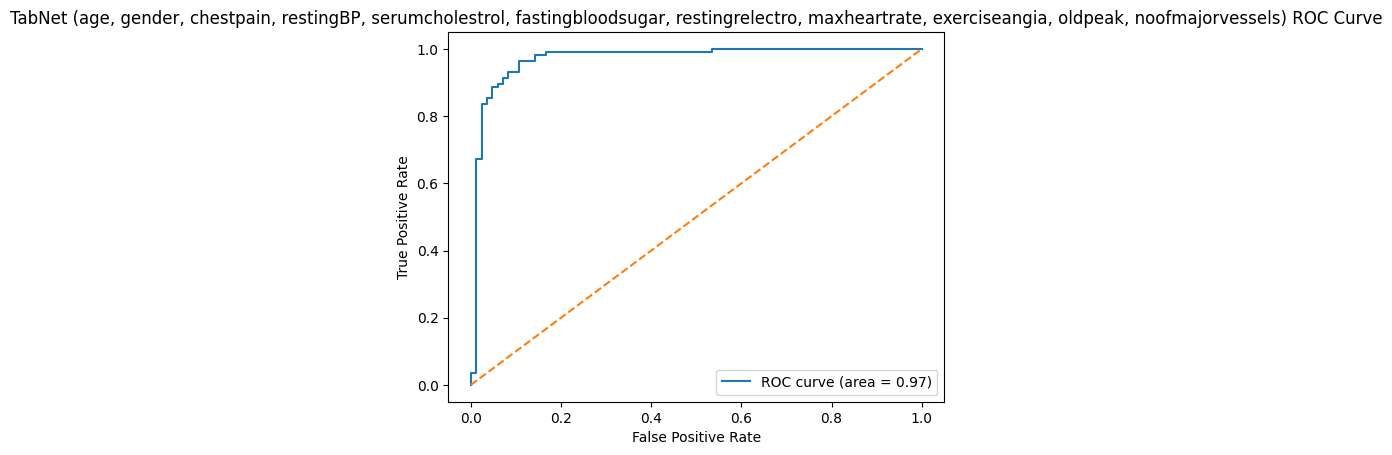

In [ ]:
tab_low_all_m = train_tabnet_multi(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'noofmajorvessels'])



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_accuracy = 0.845


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (age, gender, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, noofmajorvessels) ===
Test Accuracy : 0.835
Precision     : 0.8608695652173913
Recall        : 0.853448275862069
F1-score      : 0.8571428571428571
ROC-AUC       : 0.9017857142857143


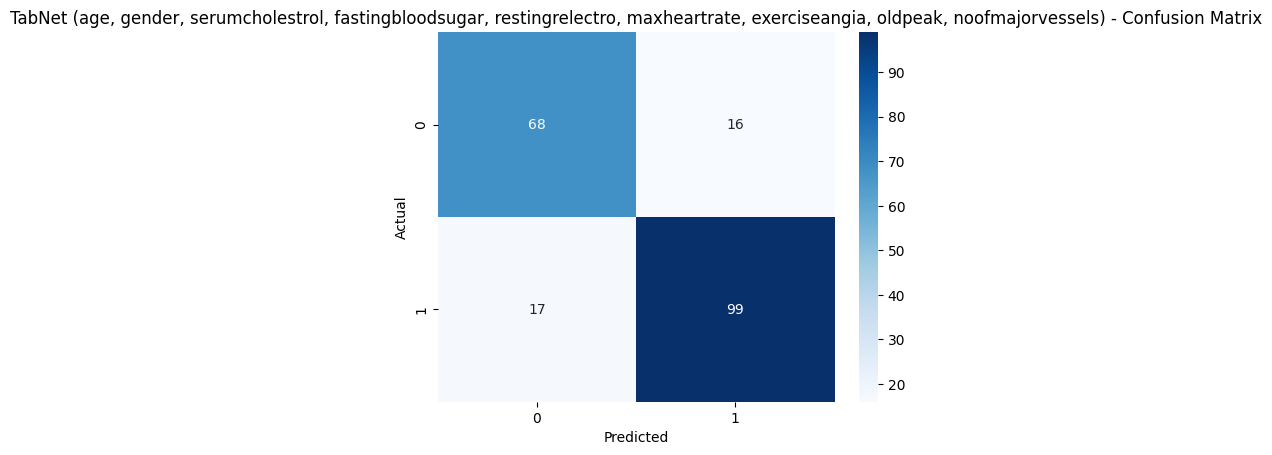

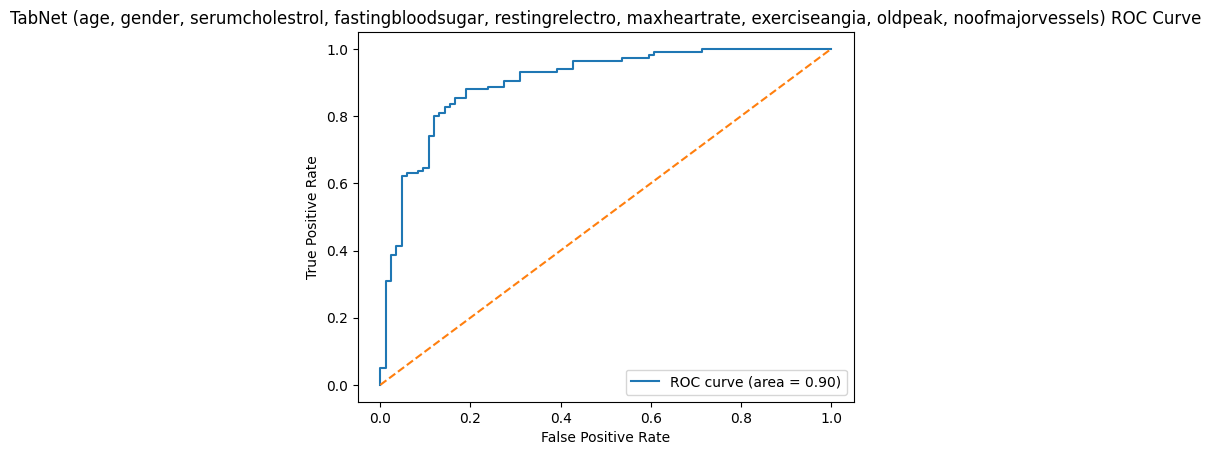

In [ ]:
tab_less_top_three_m = train_tabnet_multi(['age', 'gender', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'noofmajorvessels'])



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_accuracy = 0.845


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (serumcholestrol, restingrelectro, noofmajorvessels) ===
Test Accuracy : 0.845
Precision     : 0.8695652173913043
Recall        : 0.8620689655172413
F1-score      : 0.8658008658008658
ROC-AUC       : 0.9122536945812808


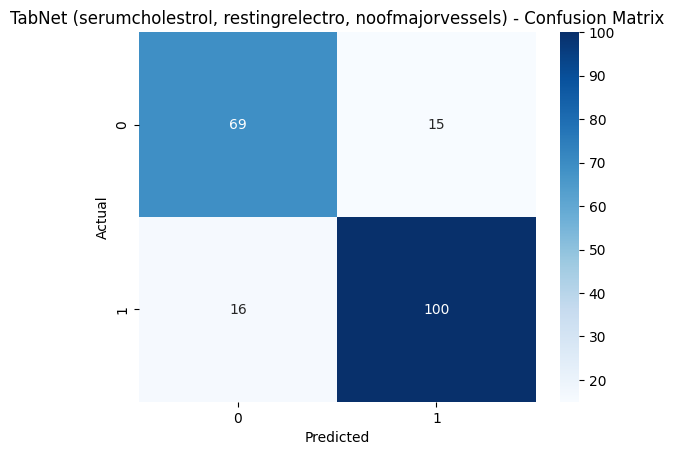

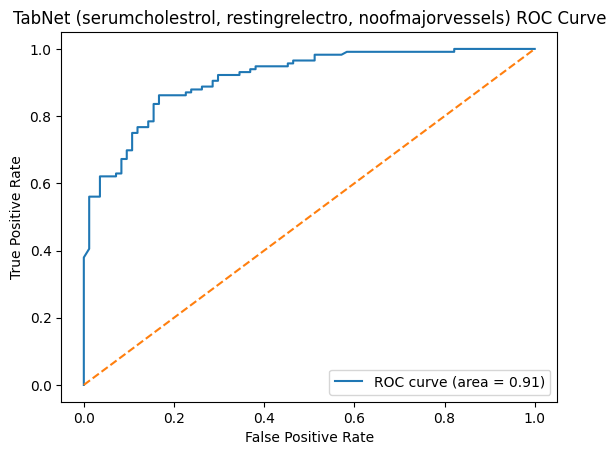

In [ ]:
tab_mid_three_m = train_tabnet_multi(['serumcholestrol', 'restingrelectro', 'noofmajorvessels'])



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_accuracy = 0.725


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (age, gender, fastingbloodsugar, maxheartrate, exerciseangia, oldpeak) ===
Test Accuracy : 0.67
Precision     : 0.6811594202898551
Recall        : 0.8103448275862069
F1-score      : 0.7401574803149606
ROC-AUC       : 0.7683189655172413


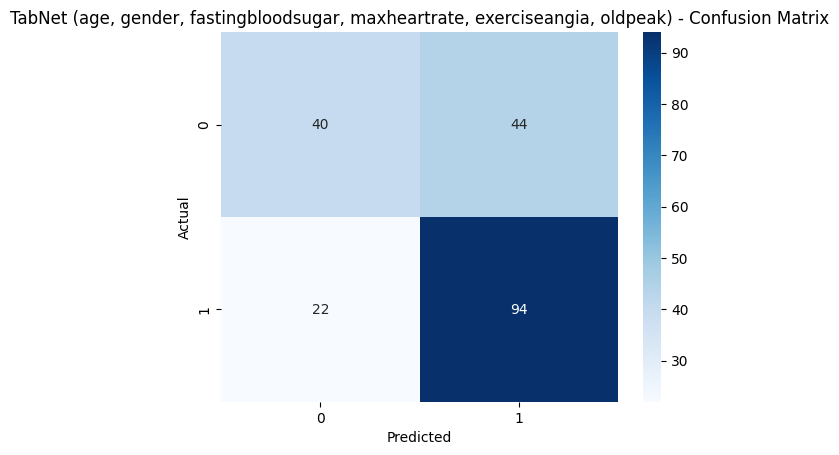

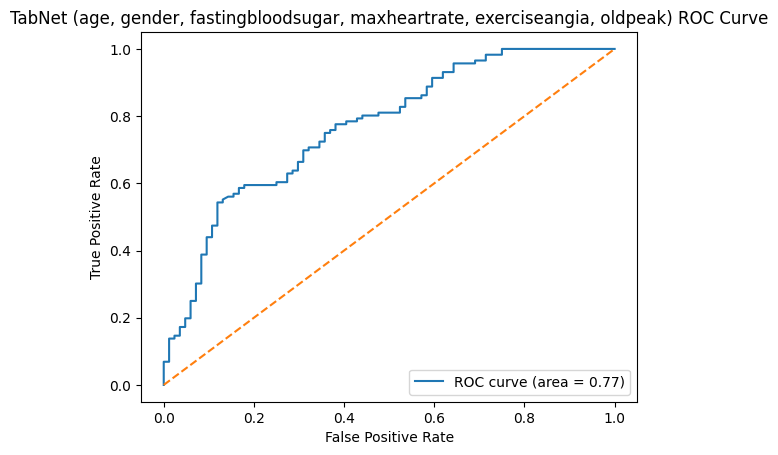

In [ ]:
tab_low_six_m = train_tabnet_multi(['age', 'gender', 'fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak'])


Lower Feature Importances Results DFs

In [ ]:
results_df = pd.DataFrame([
    mlp_low_all_m,
    mlp_less_top_three_m,
    mlp_mid_three_m,
    mlp_low_six_m,
    mlp_slope_m
])

ranked_df = results_df.sort_values(by='test_accuracy', ascending=False)
ranked_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
4,MLP (slope),0.900000,0.94,0.981481,0.913793,0.946429,0.967159
0,"MLP (['age', 'gender', 'chestpain', 'restingBP...",0.931667,0.90,0.906780,0.922414,0.914530,0.957718
1,"MLP (['age', 'gender', 'serumcholestrol', 'fas...",0.870000,0.87,0.881356,0.896552,0.888889,0.937192
2,"MLP (['serumcholestrol', 'restingrelectro', 'n...",0.825000,0.85,0.858333,0.887931,0.872881,0.923389
3,"MLP (['age', 'gender', 'fastingbloodsugar', 'm...",0.703333,0.69,0.707692,0.793103,0.747967,0.786843


In [ ]:
results_df = pd.DataFrame([
    tab_low_all_m,
    tab_less_top_three_m,
    tab_mid_three_m,
    tab_low_six_m,
    tab_slope_m
])

ranked_df = results_df.sort_values(by='test_accuracy', ascending=False)
ranked_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
4,TabNet (slope),0.900000,0.940,0.981481,0.913793,0.946429,0.969520
0,"TabNet (age, gender, chestpain, restingBP, ser...",0.961667,0.930,0.918033,0.965517,0.941176,0.970854
2,"TabNet (serumcholestrol, restingrelectro, noof...",0.828333,0.845,0.869565,0.862069,0.865801,0.912254
1,"TabNet (age, gender, serumcholestrol, fastingb...",0.845000,0.835,0.860870,0.853448,0.857143,0.901786
3,"TabNet (age, gender, fastingbloodsugar, maxhea...",0.695000,0.670,0.681159,0.810345,0.740157,0.768319


Worst Performers

In [ ]:
results_df = pd.DataFrame([
    mlp_restingBP_m,
    mlp_chestpain_m,
    tab_rest_m,
    tab_chest_m,
    mlp_low_six_m,
    tab_low_six_m

])

results_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
0,MLP (restingBP),0.760000,0.75,0.789474,0.775862,0.782609,0.801006
1,MLP (chestpain),0.801667,0.74,0.766667,0.793103,0.779661,0.778838
2,TabNet (restingBP),0.763333,0.77,0.836538,0.750000,0.790909,0.839594
3,TabNet (chestpain),0.801667,0.74,0.766667,0.793103,0.779661,0.781507
4,"MLP (['age', 'gender', 'fastingbloodsugar', 'm...",0.703333,0.69,0.707692,0.793103,0.747967,0.786843
5,"TabNet (age, gender, fastingbloodsugar, maxhea...",0.695000,0.67,0.681159,0.810345,0.740157,0.768319


New Deeper Functions

In [ ]:
def train_d_mlp_single(feature_name):
    X_tr = X_train_scaled_df[[feature_name]]
    X_val = X_val_scaled_df[[feature_name]]
    X_te = X_test_scaled_df[[feature_name]]

    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_tr, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

    y_proba = model.predict(X_te).ravel()
    y_pred = (y_proba >= 0.5).astype(int)

    print(f"\n=== MLP ({feature_name}) ===")
    print("Test Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision     :", precision_score(y_test, y_pred))
    print("Recall        :", recall_score(y_test, y_pred))
    print("F1-score      :", f1_score(y_test, y_pred))
    print("ROC-AUC       :", roc_auc_score(y_test, y_proba))

     # === Confusion Matrix ===
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"MLP ({feature_name}) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # === Loss Curves ===
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"MLP ({feature_name}) Loss Curves")
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy Loss')
    plt.legend()
    plt.show()

    # === ROC Curve ===
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{feature_name} ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"MLP ({feature_name}) ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'model': f'MLP ({feature_name})',
        'train_accuracy': accuracy_score(y_train, (model.predict(X_tr).ravel() >= 0.5).astype(int)),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

    return metrics


In [ ]:
def train_d_mlp_multi(feature_list):
    X_tr = X_train_scaled_df[feature_list]
    X_val = X_val_scaled_df[feature_list]
    X_te = X_test_scaled_df[feature_list]

    model = Sequential([
        Dense(64, activation='relu', input_shape=(len(feature_list),)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_tr, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

    y_proba = model.predict(X_te).ravel()
    y_pred = (y_proba >= 0.5).astype(int)

    print(f"\n=== MLP ({', '.join(feature_list)}) ===")
    print("Test Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision     :", precision_score(y_test, y_pred))
    print("Recall        :", recall_score(y_test, y_pred))
    print("F1-score      :", f1_score(y_test, y_pred))
    print("ROC-AUC       :", roc_auc_score(y_test, y_proba))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"MLP ({', '.join(feature_list)}) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # === Loss Curves ===
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"MLP ({feature_list}) Loss Curves")
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy Loss')
    plt.legend()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"MLP ({', '.join(feature_list)}) ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'model': f'MLP ({feature_list})',
        'train_accuracy': accuracy_score(y_train, (model.predict(X_tr).ravel() >= 0.5).astype(int)),
        'test_accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

    return metrics



In [ ]:
def train_d_tabnet_single(feature):
    X_tr = X_train_scaled_df[[feature]].values
    X_val_ = X_val_scaled_df[[feature]].values
    X_te = X_test_scaled_df[[feature]].values

    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_val_enc   = le.transform(y_val)
    y_test_enc  = le.transform(y_test)

    tabnet = TabNetClassifier(
        n_d=64,
        n_a=64,
        n_steps=5,
        n_independent=2,
        n_shared=2,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        scheduler_params={"step_size":10, "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0
    )

    tabnet.fit(
        X_train=X_tr, y_train=y_train_enc,
        eval_set=[(X_val_, y_val_enc)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=32,
        virtual_batch_size=16
    )

    y_proba = tabnet.predict_proba(X_te)[:, 1]
    y_pred = tabnet.predict(X_te)

    print(f"\n=== TabNet ({feature}) ===")
    print("Test Accuracy :", accuracy_score(y_test_enc, y_pred))
    print("Precision     :", precision_score(y_test_enc, y_pred))
    print("Recall        :", recall_score(y_test_enc, y_pred))
    print("F1-score      :", f1_score(y_test_enc, y_pred))
    print("ROC-AUC       :", roc_auc_score(y_test_enc, y_proba))

    cm = confusion_matrix(y_test_enc, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"TabNet ({feature}) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test_enc, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_score(y_test_enc, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"TabNet ({feature}) ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'model': f'TabNet ({feature})',
        'train_accuracy': accuracy_score(y_train_enc, tabnet.predict(X_tr)),
        'test_accuracy': accuracy_score(y_test_enc, y_pred),
        'precision': precision_score(y_test_enc, y_pred),
        'recall': recall_score(y_test_enc, y_pred),
        'f1': f1_score(y_test_enc, y_pred),
        'roc_auc': roc_auc_score(y_test_enc, y_proba)
    }

    return metrics

In [ ]:
def train_d_tabnet_multi(features):
    X_tr = X_train_scaled_df[features].values
    X_val_ = X_val_scaled_df[features].values
    X_te = X_test_scaled_df[features].values

    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_val_enc   = le.transform(y_val)
    y_test_enc  = le.transform(y_test)

    tabnet = TabNetClassifier(
        n_d=64,
        n_a=64,
        n_steps=5,
        n_independent=2,
        n_shared=2,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        scheduler_params={"step_size":10, "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        verbose=0
    )

    tabnet.fit(
        X_train=X_tr, y_train=y_train_enc,
        eval_set=[(X_val_, y_val_enc)],
        eval_name=["val"],
        eval_metric=["accuracy"],
        max_epochs=100,
        patience=10,
        batch_size=32,
        virtual_batch_size=16
    )

    y_proba = tabnet.predict_proba(X_te)[:, 1]
    y_pred = tabnet.predict(X_te)

    print(f"\n=== TabNet ({', '.join(features)}) ===")
    print("Test Accuracy :", accuracy_score(y_test_enc, y_pred))
    print("Precision     :", precision_score(y_test_enc, y_pred))
    print("Recall        :", recall_score(y_test_enc, y_pred))
    print("F1-score      :", f1_score(y_test_enc, y_pred))
    print("ROC-AUC       :", roc_auc_score(y_test_enc, y_proba))

    cm = confusion_matrix(y_test_enc, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"TabNet ({', '.join(features)}) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test_enc, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_score(y_test_enc, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"TabNet ({', '.join(features)}) ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'model': f'TabNet ({", ".join(features)})',
        'train_accuracy': accuracy_score(y_train_enc, tabnet.predict(X_tr)),
        'test_accuracy': accuracy_score(y_test_enc, y_pred),
        'precision': precision_score(y_test_enc, y_pred),
        'recall': recall_score(y_test_enc, y_pred),
        'f1': f1_score(y_test_enc, y_pred),
        'roc_auc': roc_auc_score(y_test_enc, y_proba)
    }

    return metrics

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

=== MLP (restingBP) ===
Test Accuracy : 0.77
Precision     : 0.8365384615384616
Recall        : 0.75
F1-score      : 0.7909090909090909
ROC-AUC       : 0.8485221674876847


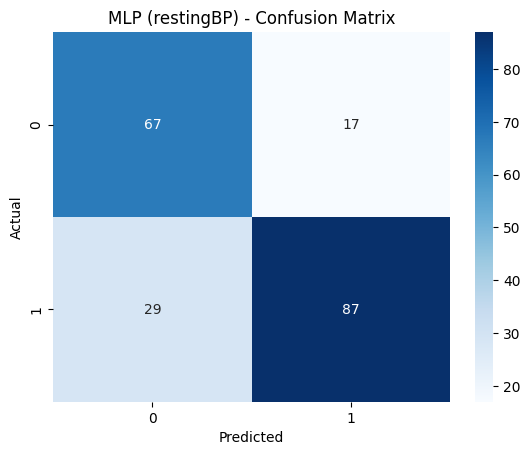

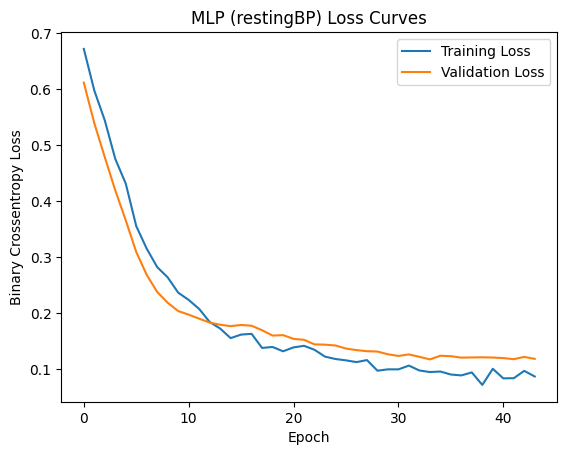

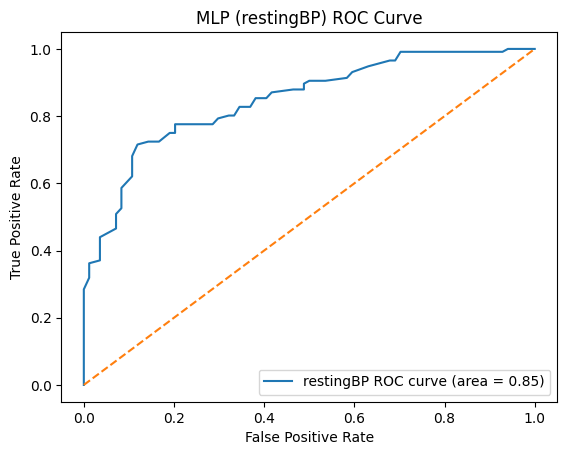

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
d_mlp_rest_m = train_d_mlp_single('restingBP')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

=== MLP (chestpain) ===
Test Accuracy : 0.74
Precision     : 0.7666666666666667
Recall        : 0.7931034482758621
F1-score      : 0.7796610169491526
ROC-AUC       : 0.7788382594417078


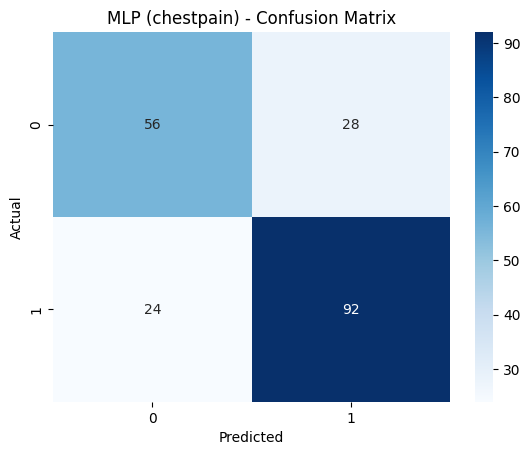

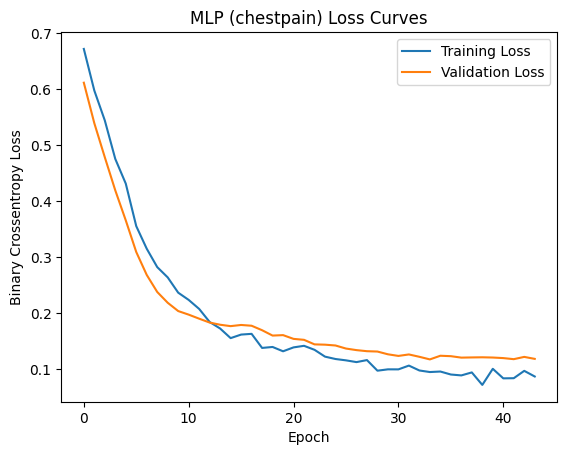

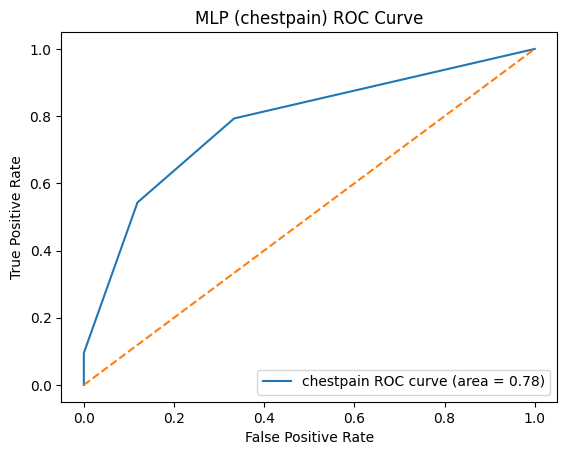

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
d_mlp_chest_m = train_d_mlp_single('chestpain')


Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_accuracy = 0.77


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (restingBP) ===
Test Accuracy : 0.77
Precision     : 0.8365384615384616
Recall        : 0.75
F1-score      : 0.7909090909090909
ROC-AUC       : 0.8488813628899836


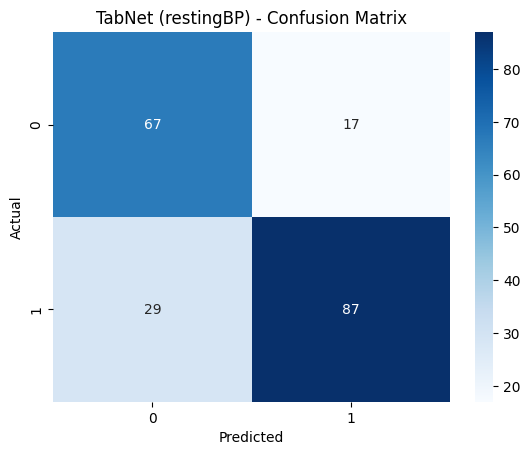

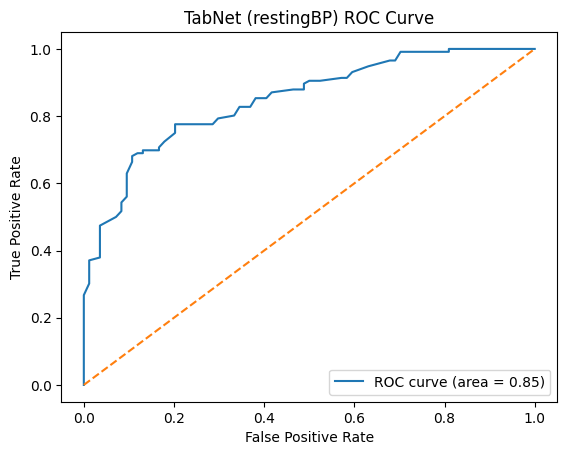

In [ ]:
d_tab_rest_m = train_d_tabnet_single('restingBP')


Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_accuracy = 0.775


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (chestpain) ===
Test Accuracy : 0.74
Precision     : 0.7666666666666667
Recall        : 0.7931034482758621
F1-score      : 0.7796610169491526
ROC-AUC       : 0.7853037766830869


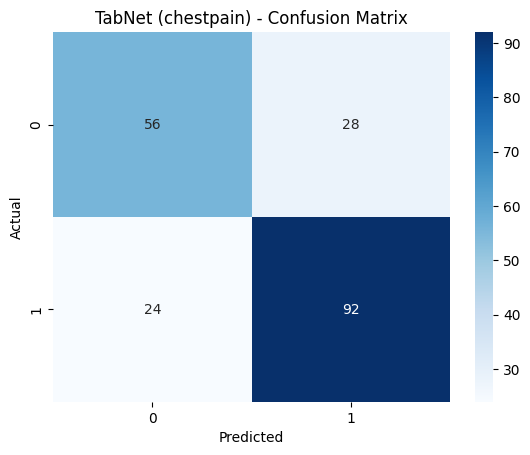

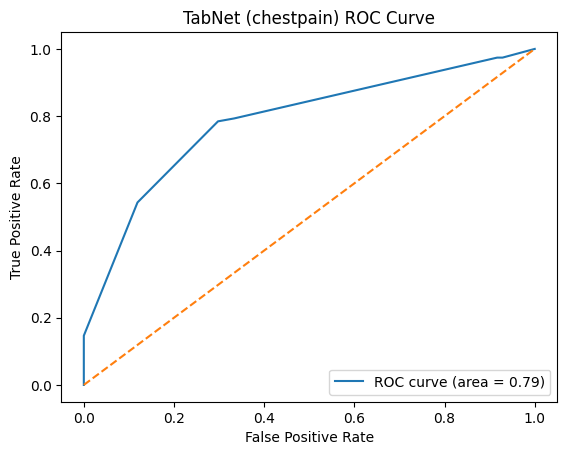

In [ ]:
d_tab_chest_m = train_d_tabnet_single('chestpain')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

=== MLP (age, gender, fastingbloodsugar, maxheartrate, exerciseangia, oldpeak) ===
Test Accuracy : 0.725
Precision     : 0.7364341085271318
Recall        : 0.8189655172413793
F1-score      : 0.7755102040816326
ROC-AUC       : 0.8052134646962233


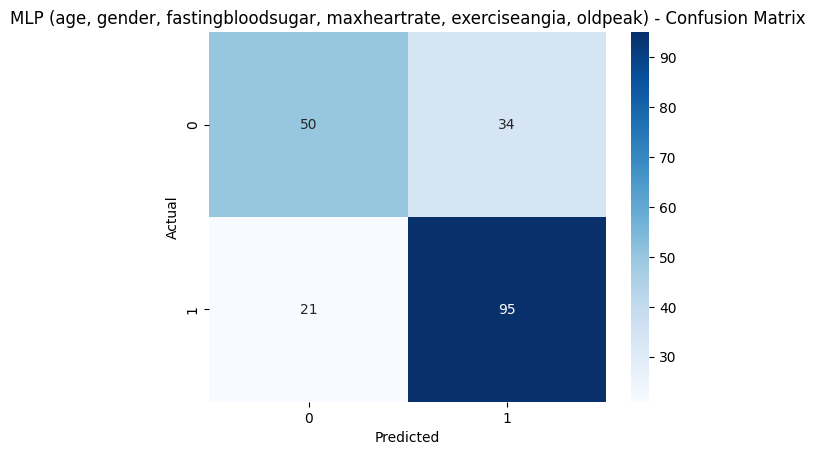

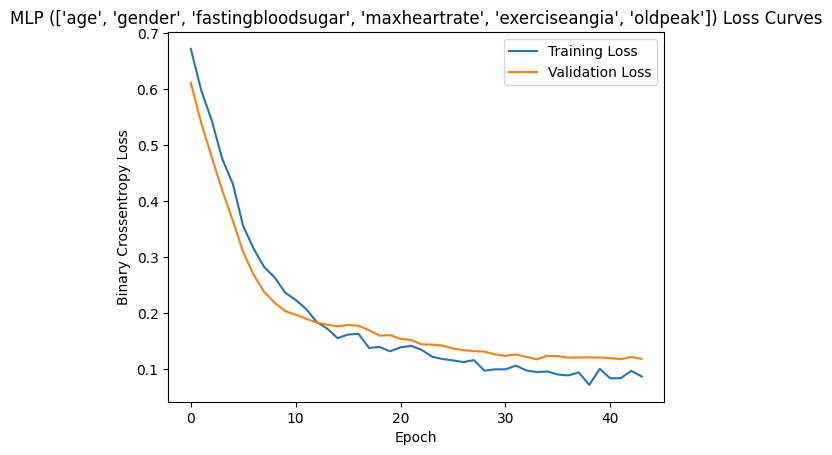

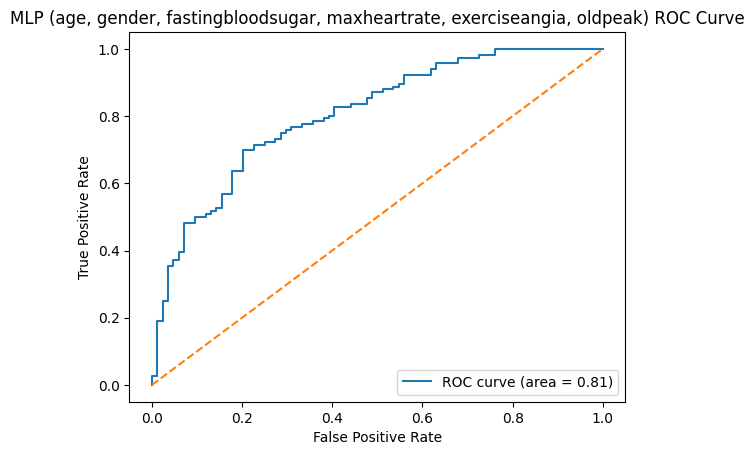

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
d_mlp_low_six_m = train_d_mlp_multi(['age', 'gender', 'fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak'])


Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_accuracy = 0.71


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== TabNet (age, gender, fastingbloodsugar, maxheartrate, exerciseangia, oldpeak) ===
Test Accuracy : 0.675
Precision     : 0.6888888888888889
Recall        : 0.8017241379310345
F1-score      : 0.7410358565737052
ROC-AUC       : 0.7448686371100164


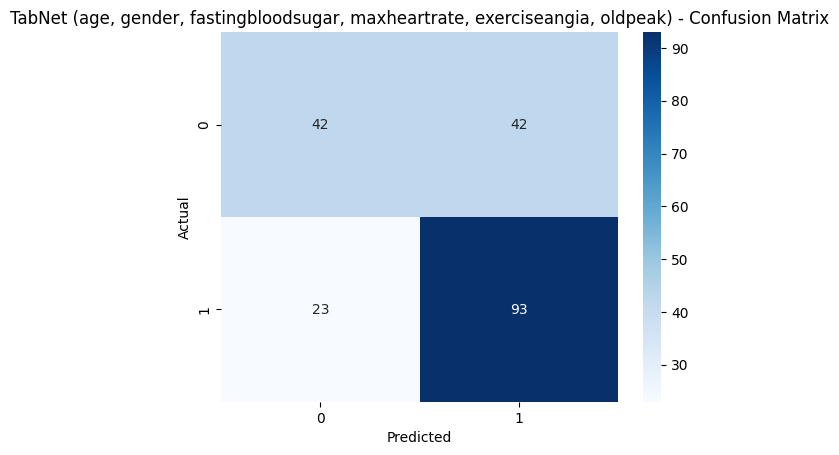

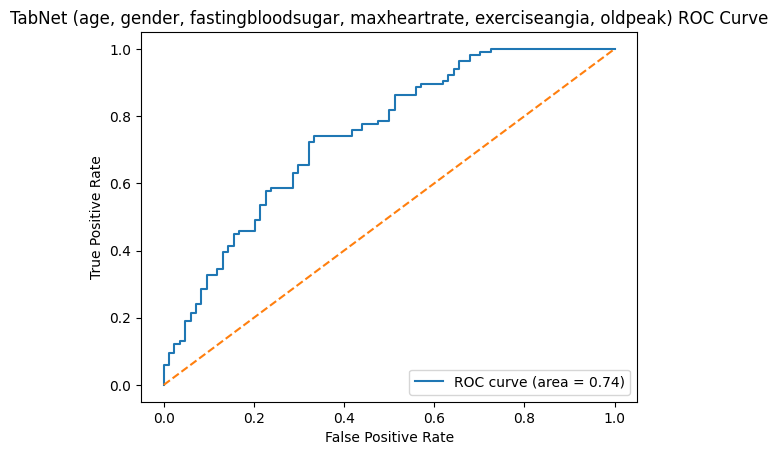

In [ ]:
d_tab_low_six_m = train_d_tabnet_multi(['age', 'gender', 'fastingbloodsugar', 'maxheartrate', 'exerciseangia', 'oldpeak'])

Deeper Model DFs

In [ ]:
results_df = pd.DataFrame([
    d_mlp_rest_m,
    d_mlp_chest_m,
    d_tab_rest_m,
    d_tab_chest_m,
    d_mlp_low_six_m,
    d_tab_low_six_m
])

results_df[['model', 'train_accuracy', 'test_accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

,model,train_accuracy,test_accuracy,precision,recall,f1,roc_auc
0,MLP (restingBP),0.763333,0.770,0.836538,0.750000,0.790909,0.848522
1,MLP (chestpain),0.801667,0.740,0.766667,0.793103,0.779661,0.778838
2,TabNet (restingBP),0.763333,0.770,0.836538,0.750000,0.790909,0.848881
3,TabNet (chestpain),0.801667,0.740,0.766667,0.793103,0.779661,0.785304
4,"MLP (['age', 'gender', 'fastingbloodsugar', 'm...",0.735000,0.725,0.736434,0.818966,0.775510,0.805213
5,"TabNet (age, gender, fastingbloodsugar, maxhea...",0.685000,0.675,0.688889,0.801724,0.741036,0.744869


In [ ]:
# Assuming 'slope' is the feature and 'target' is the binary label (1 = disease, 0 = no disease)
slope_counts = df.groupby('slope')['target'].value_counts().unstack().fillna(0)
slope_counts['disease_rate'] = slope_counts[1] / (slope_counts[0] + slope_counts[1])
print(slope_counts)

target      0      1  disease_rate
slope                             
0       180.0    0.0      0.000000
1       228.0   71.0      0.237458
2        12.0  310.0      0.962733
3         0.0  199.0      1.000000


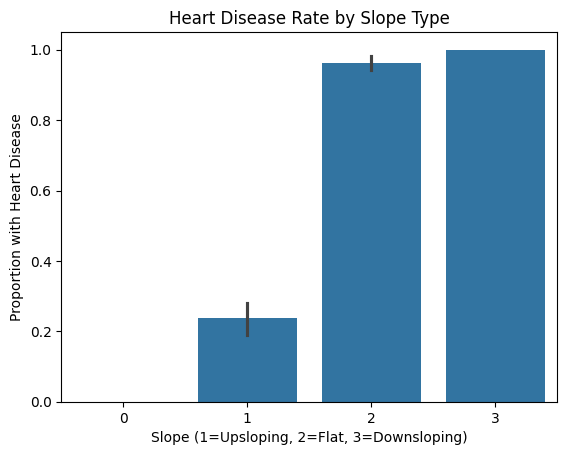

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='slope', y='target', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Heart Disease Rate by Slope Type")
plt.xlabel("Slope (1=Upsloping, 2=Flat, 3=Downsloping)")
plt.ylabel("Proportion with Heart Disease")
plt.show()

/tmp/ipython-input-720810755.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_counts = df.groupby('restingBP_bin')['target'].value_counts().unstack().fillna(0)
/tmp/ipython-input-720810755.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='restingBP_bin', y='target', data=df, estimator=lambda x: sum(x)/len(x), ci=None)


target           0    1  disease_rate
restingBP_bin                        
90–110          77   20      0.206186
111–130        142   47      0.248677
131–150        127  114      0.473029
151–170         25  133      0.841772
171–200         49  266      0.844444


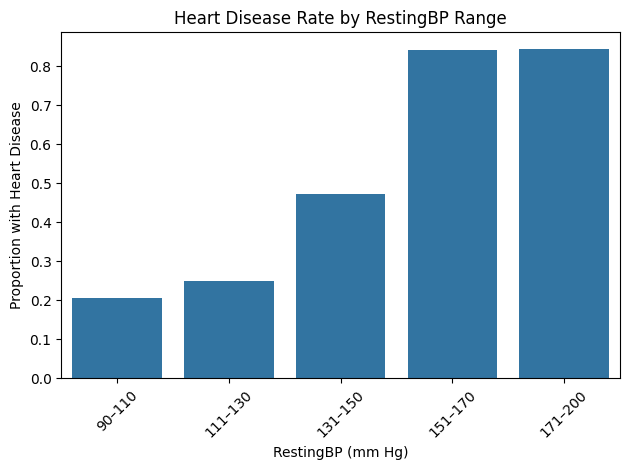

In [ ]:
# Create bins and labels
bins = [90, 110, 130, 150, 170, 200]
labels = ['90–110', '111–130', '131–150', '151–170', '171–200']

# Add binned column
df['restingBP_bin'] = pd.cut(df['restingBP'], bins=bins, labels=labels, include_lowest=True)

bp_counts = df.groupby('restingBP_bin')['target'].value_counts().unstack().fillna(0)
bp_counts['disease_rate'] = bp_counts[1] / (bp_counts[0] + bp_counts[1])
print(bp_counts)

sns.barplot(x='restingBP_bin', y='target', data=df, estimator=lambda x: sum(x)/len(x), ci=None)
plt.title("Heart Disease Rate by RestingBP Range")
plt.xlabel("RestingBP (mm Hg)")
plt.ylabel("Proportion with Heart Disease")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

target       0    1  disease_rate
chestpain                        
0          312  108      0.257143
1           70  154      0.687500
2           33  279      0.894231
3            5   39      0.886364


/tmp/ipython-input-2657858698.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='chestpain', y='target', data=df, estimator=lambda x: sum(x)/len(x), ci=None)


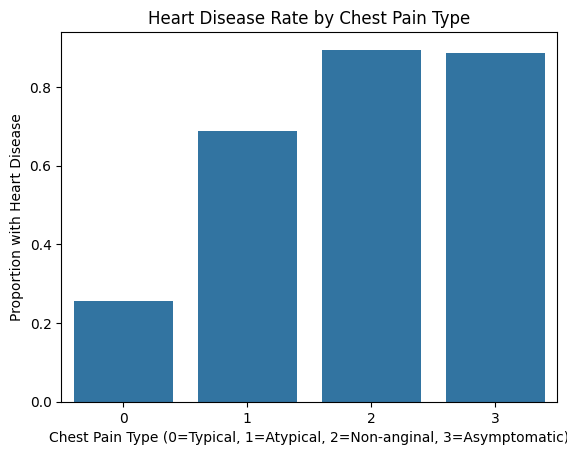

In [ ]:
# Group by chestpain and compute disease rate
cp_counts = df.groupby('chestpain')['target'].value_counts().unstack().fillna(0)
cp_counts['disease_rate'] = cp_counts[1] / (cp_counts[0] + cp_counts[1])
print(cp_counts)

sns.barplot(x='chestpain', y='target', data=df, estimator=lambda x: sum(x)/len(x), ci=None)
plt.title("Heart Disease Rate by Chest Pain Type")
plt.xlabel("Chest Pain Type (0=Typical, 1=Atypical, 2=Non-anginal, 3=Asymptomatic)")
plt.ylabel("Proportion with Heart Disease")
plt.show()